In [21]:
import os
import random
from datetime import datetime
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

In [109]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import transforms, models
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import json
import matplotlib.pyplot as plt
from torch.nn import Dropout

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
!unzip "drive/MyDrive/Machine Leaning: May hoc/CLASS-IMAGES.zip" -d ./

Streaming output truncated to the last 5000 lines.
  inflating: ./CLASS-IMAGES/Yamaha/21522734-21522821.Yamaha.19.jpg  
  inflating: ./CLASS-IMAGES/Yamaha/21522734-21522821.Yamaha.2.jpg  
  inflating: ./CLASS-IMAGES/Yamaha/21522734-21522821.Yamaha.20.jpg  
  inflating: ./CLASS-IMAGES/Yamaha/21522734-21522821.Yamaha.21.jpg  
  inflating: ./CLASS-IMAGES/Yamaha/21522734-21522821.Yamaha.22.jpg  
  inflating: ./CLASS-IMAGES/Yamaha/21522734-21522821.Yamaha.23.jpg  
  inflating: ./CLASS-IMAGES/Yamaha/21522734-21522821.Yamaha.24.jpg  
  inflating: ./CLASS-IMAGES/Yamaha/21522734-21522821.Yamaha.25.jpg  
  inflating: ./CLASS-IMAGES/Yamaha/21522734-21522821.Yamaha.26.jpg  
  inflating: ./CLASS-IMAGES/Yamaha/21522734-21522821.Yamaha.27.jpg  
  inflating: ./CLASS-IMAGES/Yamaha/21522734-21522821.Yamaha.28.jpg  
  inflating: ./CLASS-IMAGES/Yamaha/21522734-21522821.Yamaha.29.jpg  
  inflating: ./CLASS-IMAGES/Yamaha/21522734-21522821.Yamaha.3.jpg  
  inflating: ./CLASS-IMAGES/Yamaha/21522734-21522821.Y

In [3]:
label_mapping = {
    'Others': 0,
    'Honda': 1,
    'Suzuki': 2,
    'Yamaha': 3,
    'VinFast': 4
}
reverse_label_mapping={
    0: 'Others',
    1: 'Honda',
    2: 'Suzuki',
    3: 'Yamaha',
    4: 'VinFast'
}

In [4]:
class CustomImageDataset(Dataset):
    def __init__(self, df, save_dir, transform=None):
        self.df = df
        self.save_dir = save_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # print(self.df.iloc[idx]['full_path'])
        img_path = os.path.join(self.save_dir , self.df.iloc[idx]['full_path'])
        label = self.df.iloc[idx]['label_idx']

        # Open the image file
        image = Image.open(img_path).convert('RGB')

        # Apply transformation if provided
        if self.transform:
            image = self.transform(image)

        return image, label

## filtering noises, return new cleaned CSV of splits

In [ ]:
def can_load_image(file_path):
    try:
        image = Image.open(file_path).convert('RGB')
        return True
    except Exception as ex:  # Catch all exceptions (FileNotFoundError, IOError, etc.)
        # print(ex)
        return False

In [ ]:
def transform_df_img_path(csv_path, img_dir,label_mapping={}):
    df_transformed = pd.read_csv(csv_path,header=None, names=['file_name','label_idx'])
    def transform(row):
         return f"{img_dir}/{row['file_name']}"
    df_transformed['file_name'] = df_transformed.apply(transform, axis=1)
    # print(df_transformed.head(2))
    df_transformed.rename(columns={'file_name': 'full_path'}, inplace=True)
    df_transformed = df_transformed[df_transformed['full_path'].apply(can_load_image)]
    print(df_transformed.head(2))
    return df_transformed


In [ ]:
def clean_splits(csv_dir,img_dir):
    for i in range(1,6):
        train_path= f'{csv_dir}/MotocycleDataset-Splits-{i}-Train.csv'
        test_path = f'{csv_dir}/MotocycleDataset-Splits-{i}-Test.csv'

        save_train_path = f'./MotocycleDataset-train-clean-{i}.csv'
        save_test_path = f'./MotocycleDataset-test-clean-{i}.csv'

        df_path_train = transform_df_img_path(train_path,img_dir, label_mapping=reverse_label_mapping)
        df_path_test = transform_df_img_path(test_path, img_dir, label_mapping=reverse_label_mapping)

        df_path_train.to_csv(save_train_path,
        index=False, na_rep='N/A',  header=True)

        df_path_test.to_csv(save_test_path,
        index=False, na_rep='N/A',  header=True )

In [ ]:
clean_splits('./SPLIT-CSVs','./CLASS-IMAGES')

C:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


                                           full_path  label_idx
0  ./CLASS-IMAGES/Honda/22520968-22520996-2252099...          1
1  ./CLASS-IMAGES/Honda/22520968-22520996-2252099...          1


C:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


                                           full_path  label_idx
0  ./CLASS-IMAGES/Honda/22520968-22520996-2252099...          1
1  ./CLASS-IMAGES/Honda/22520968-22520996-2252099...          1


C:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


                                           full_path  label_idx
0  ./CLASS-IMAGES/Honda/22520968-22520996-2252099...          1
1  ./CLASS-IMAGES/Honda/22520968-22520996-2252099...          1


C:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


## Done filtering noises

In [ ]:
df_path_1 = pd.read_csv('./SPLITS-CSV/MotocycleDataset-train-clean-1.csv')

,full_path,label_idx
0,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1
1,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1


In [ ]:
transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()
    ])


In [ ]:
dataset = CustomImageDataset(df_path_1, save_dir='./', transform=transform)

In [ ]:
    # Example of accessing an item
image, label = dataset[0]
# print(f'Label: {label}')
print(f'Image size: {image}')  # Image is now a tensor

./CLASS-IMAGES/Honda/22520968-22520996-22520999-22520929-22521373.Honda.786.jpg
Image size: tensor([[[0.8078, 0.7333, 0.5686,  ..., 0.5608, 0.5765, 0.6275],
         [0.8118, 0.7373, 0.5804,  ..., 0.5882, 0.6431, 0.7412],
         [0.8235, 0.7373, 0.5961,  ..., 0.6078, 0.6863, 0.7725],
         ...,
         [0.8627, 0.8510, 0.8431,  ..., 0.8392, 0.8392, 0.8392],
         [0.8627, 0.8549, 0.8471,  ..., 0.8353, 0.8353, 0.8353],
         [0.8588, 0.8549, 0.8588,  ..., 0.8392, 0.8353, 0.8353]],

        [[0.8118, 0.7333, 0.5490,  ..., 0.0471, 0.0706, 0.1020],
         [0.8118, 0.7373, 0.5569,  ..., 0.0902, 0.1647, 0.1765],
         [0.8275, 0.7412, 0.5686,  ..., 0.0941, 0.1373, 0.1608],
         ...,
         [0.8118, 0.8039, 0.8000,  ..., 0.7882, 0.7882, 0.7843],
         [0.8039, 0.8000, 0.7961,  ..., 0.7922, 0.7843, 0.7843],
         [0.8000, 0.8000, 0.7961,  ..., 0.7922, 0.7882, 0.7922]],

        [[0.7804, 0.7059, 0.5373,  ..., 0.0549, 0.0824, 0.1176],
         [0.7882, 0.7137, 0.545

In [ ]:
def show_images(images, labels, n_images=10, mapping={}):
    # Denormalize images if needed (assuming ToTensor() was used without normalization)
    # Convert from tensor (C, H, W) to numpy (H, W, C) and transpose dimensions
    images = images.permute(0, 2, 3, 1).numpy()

    # Create a figure to display the images
    fig, axes = plt.subplots(1, n_images, figsize=(15, 15))
    for i in range(n_images):
        image = images[i]
        label = mapping[labels[i].item()]
        # Show the image
        ax = axes[i]
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(label)

    plt.show()

In [ ]:
data_loader_tranformed = DataLoader(dataset, batch_size=32, shuffle=True)
data_loader_tranformed

In [ ]:
data_iter_transformed = iter(data_loader_tranformed)
images, labels = next(data_iter_transformed)

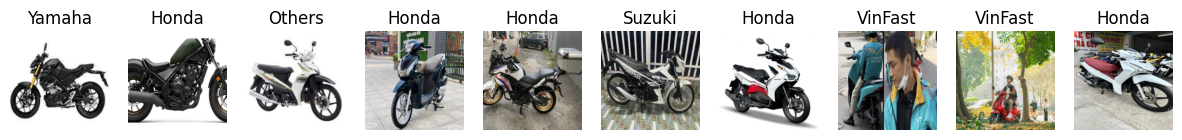

In [ ]:
show_images(images, labels, n_images=10,mapping=reverse_label_mapping)

## Start train

In [ ]:
class EarlyStopping:
    def __init__(self, patience=15, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        # self.val_loss=1000

    def consume_loss(self, val_loss, model):
        print(f'in early: val_loss vs best_loss: {val_loss} - {self.best_loss}')
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
            self.save_checkpoint(val_loss, model)
        else:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True

    def save_checkpoint(self, val_loss, model):
        torch.save(model.state_dict(), 'checkpoint.pt')



In [ ]:
def save_model(model, epoch, train_loss, val_loss, train_acc, val_acc, checkpoint_savedir):
    save_dict = {
        "model": model.state_dict(),
        "val_loss": val_loss,
        "train_loss": train_loss,
        "train_acc": train_acc,
        "val_acc": val_acc
    }
    checkpoint_path = os.path.join(checkpoint_savedir, f'epoch_{epoch}.pth')
    torch.save(save_dict, checkpoint_path)
    print(f"saved model at epoch {epoch}: {checkpoint_path}")

def train_model(model, train_loader:DataLoader, val_loader:DataLoader,
                criterion, optimizer, scheduler,current_epoch, num_epochs, checkpoint_savedir='./models', early_stopping=None):
    device = device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"device: {device}")
    model.to(device)

    best_loss = float('inf')
    train_size = len(train_loader.dataset)
    val_size = len(val_loader.dataset)
    print(f"train size: {train_size}")
    print(f"val size: {val_size}")

    for epoch in range(current_epoch,num_epochs+1):
        model.train()
        running_loss = 0.0

        # Training Phase
        train_corrects = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)

            _, preds = torch.max(outputs, 1)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            train_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / train_size
        train_acc = train_corrects*100 / train_size
        print(f"Training Loss: {epoch_loss:.6f} ; Acc: {train_acc:.4f}")

        # Validation Phase
        model.eval()
        val_loss = 0.0
        val_corrects = 0
        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc=f"Validation Epoch {epoch+1}/{num_epochs}"):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)

        val_epoch_loss = val_loss / val_size
        val_acc = val_corrects*100 / val_size
        print(f"Validation Loss: {val_epoch_loss:.4f}; Acc: {val_acc:.4f}")

        # Update scheduler
        scheduler.step(val_epoch_loss)
        # Save checkpoint
        os.makedirs(checkpoint_savedir, exist_ok=True)
        save_model(model, epoch, epoch_loss, val_epoch_loss, train_acc, val_acc, checkpoint_savedir)

        if(early_stopping):
            early_stopping.consume_loss(val_loss, model)
            if early_stopping.early_stop:
                print("Early stopping!!!!!!!!!!!!!!!!!!")
                break

        # Save the best model based on validation loss
        if val_epoch_loss < best_loss:
            best_loss = val_epoch_loss
            best_model_path = os.path.join(checkpoint_savedir, 'best_model.pth')
            torch.save(model.state_dict(), best_model_path)
            print(f"Best model updated with validation loss {best_loss:.4f} and saved at {best_model_path}")

In [15]:
IMG_SIZE = 360
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(IMG_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.CenterCrop(IMG_SIZE-24),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [ ]:
num_classes = 5  # Number of classes in your dataset
model = models.mobilenet_v3_large(weights='DEFAULT')
# print(model)
# num_ftrs = model.fc.in_features
# model.fc = nn.Linear(num_ftrs, num_classes)
model.classifier = nn.Sequential(
    nn.Linear(in_features=960, out_features=1280, bias=True),
    nn.Hardswish(),
    nn.Dropout(p=0.2),
    nn.Linear(in_features=1280, out_features=5, bias=True)
)
# model.heads = nn.Linear(768, 5)
#    (1): Hardswish()
#     (2): Dropout(p=0.2, inplace=True)
#     (3): Linear(in_features=1280, out_features=1000, bias=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Define criterion, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=5e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)
# early_stopping = EarlyStopping(patience=25, verbose=True)


cuda


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
df_split_1 = pd.read_csv('./SPLITS-CSV/MotocycleDataset-train-clean-1.csv')
df_split_1 = df_split_1[df_split_1['full_path'].apply(can_load_image)]

/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
train_df, val_df = train_test_split(df_split_1, test_size=0.2, random_state=42)

In [ ]:
train_df.to_csv('./split-1-train.csv',
        index=False, na_rep='N/A',  header=True)
val_df.to_csv('./split-1-val.csv',
        index=False, na_rep='N/A',  header=True)

## TRAINING FOR SPLIT-1

In [ ]:
train_df = pd.read_csv('./split-1-train.csv')
val_df = pd.read_csv('./split-1-val.csv')

In [ ]:
train_dataset = CustomImageDataset(train_df,save_dir='./',transform=train_transform)
val_dataset=CustomImageDataset(val_df,save_dir='./',transform=val_transform)
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,  num_workers=6)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False,num_workers=6)

In [ ]:
num_epochs=80
current_epoch = 1
train_model(model, train_loader, val_loader, criterion, optimizer, scheduler,current_epoch, num_epochs, checkpoint_savedir='./models')

device: cuda
train size: 22223
val size: 5556


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 1.251844 ; Acc: 46.7399


Validation Epoch 2/80:   1%|          | 2/174 [00:00<00:41,  4.14it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 2/80:  17%|█▋        | 30/174 [00:02<00:09, 15.77it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 2/80:  21%|██        | 36/174 [00:02<00:07, 17.95it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 2/80:  25%|██▌       | 44/174 [00:03<00:06, 19.21it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images wi

Validation Loss: 1.0017; Acc: 58.8553
saved model at epoch 1: ./models/epoch_1.pth
Best model updated with validation loss 1.0017 and saved at ./models/best_model.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.990243 ; Acc: 60.3429


Validation Epoch 3/80:   1%|          | 2/174 [00:00<00:40,  4.20it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 3/80:  17%|█▋        | 30/174 [00:02<00:08, 16.04it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 3/80:  21%|██        | 36/174 [00:02<00:07, 17.98it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 3/80:  25%|██▍       | 43/174 [00:02<00:06, 19.07it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images wi

Validation Loss: 0.8002; Acc: 68.9525
saved model at epoch 2: ./models/epoch_2.pth
Best model updated with validation loss 0.8002 and saved at ./models/best_model.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.866134 ; Acc: 65.7967


Validation Epoch 4/80:   1%|          | 2/174 [00:00<00:42,  4.03it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 4/80:  17%|█▋        | 30/174 [00:02<00:08, 16.64it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 4/80:  21%|██        | 36/174 [00:02<00:07, 18.33it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 4/80:  25%|██▌       | 44/174 [00:02<00:06, 19.28it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images wi

Validation Loss: 0.7520; Acc: 71.0223
saved model at epoch 3: ./models/epoch_3.pth
Best model updated with validation loss 0.7520 and saved at ./models/best_model.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.807132 ; Acc: 68.4336


Validation Epoch 5/80:   1%|          | 2/174 [00:00<00:40,  4.28it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 5/80:  17%|█▋        | 30/174 [00:02<00:08, 16.04it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 5/80:  21%|██        | 36/174 [00:02<00:07, 18.03it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 5/80:  25%|██▌       | 44/174 [00:02<00:06, 19.28it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images wi

Validation Loss: 0.6351; Acc: 76.5479
saved model at epoch 4: ./models/epoch_4.pth
Best model updated with validation loss 0.6351 and saved at ./models/best_model.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.750212 ; Acc: 71.1785


Validation Epoch 6/80:   1%|          | 2/174 [00:00<00:40,  4.30it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 6/80:  18%|█▊        | 32/174 [00:02<00:08, 16.96it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 6/80:  20%|██        | 35/174 [00:02<00:07, 17.93it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 6/80:  24%|██▍       | 42/174 [00:02<00:06, 19.30it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images wi

Validation Loss: 0.5939; Acc: 78.5097
saved model at epoch 5: ./models/epoch_5.pth
Best model updated with validation loss 0.5939 and saved at ./models/best_model.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.703381 ; Acc: 72.9064


Validation Epoch 7/80:   1%|          | 2/174 [00:00<00:41,  4.16it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 7/80:  18%|█▊        | 32/174 [00:02<00:08, 17.00it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 7/80:  20%|█▉        | 34/174 [00:02<00:07, 17.58it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 7/80:  24%|██▍       | 42/174 [00:02<00:06, 19.19it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images wi

Validation Loss: 0.5813; Acc: 78.5997
saved model at epoch 6: ./models/epoch_6.pth
Best model updated with validation loss 0.5813 and saved at ./models/best_model.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.671230 ; Acc: 74.3194


Validation Epoch 8/80:   1%|          | 2/174 [00:00<00:41,  4.14it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 8/80:  18%|█▊        | 31/174 [00:02<00:08, 16.51it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 8/80:  20%|██        | 35/174 [00:02<00:07, 17.81it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 8/80:  25%|██▌       | 44/174 [00:02<00:06, 19.32it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images wi

Validation Loss: 0.5882; Acc: 79.1937
saved model at epoch 7: ./models/epoch_7.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.626579 ; Acc: 76.2183


Validation Epoch 9/80:   1%|          | 2/174 [00:00<00:40,  4.30it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 9/80:  17%|█▋        | 30/174 [00:02<00:09, 15.76it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 9/80:  21%|██        | 36/174 [00:02<00:07, 17.82it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 9/80:  24%|██▍       | 42/174 [00:02<00:06, 18.89it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images wi

Validation Loss: 0.5437; Acc: 81.5515
saved model at epoch 8: ./models/epoch_8.pth
Best model updated with validation loss 0.5437 and saved at ./models/best_model.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.602880 ; Acc: 77.2263


Validation Epoch 10/80:   2%|▏         | 3/174 [00:00<00:28,  6.11it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 10/80:  18%|█▊        | 32/174 [00:02<00:08, 16.74it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 10/80:  20%|█▉        | 34/174 [00:02<00:08, 17.49it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 10/80:  25%|██▍       | 43/174 [00:02<00:06, 19.19it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5348; Acc: 81.4075
saved model at epoch 9: ./models/epoch_9.pth
Best model updated with validation loss 0.5348 and saved at ./models/best_model.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.579442 ; Acc: 78.0723


Validation Epoch 11/80:   1%|          | 2/174 [00:00<00:41,  4.15it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 11/80:  17%|█▋        | 30/174 [00:02<00:09, 15.77it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 11/80:  20%|██        | 35/174 [00:02<00:07, 17.56it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 11/80:  24%|██▍       | 42/174 [00:02<00:06, 18.97it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5137; Acc: 82.4514
saved model at epoch 10: ./models/epoch_10.pth
Best model updated with validation loss 0.5137 and saved at ./models/best_model.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.562678 ; Acc: 78.4323


Validation Epoch 12/80:   1%|          | 2/174 [00:00<00:40,  4.30it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 12/80:  18%|█▊        | 32/174 [00:02<00:08, 16.73it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 12/80:  21%|██        | 36/174 [00:02<00:07, 18.00it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 12/80:  25%|██▍       | 43/174 [00:02<00:06, 19.10it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5123; Acc: 83.2613
saved model at epoch 11: ./models/epoch_11.pth
Best model updated with validation loss 0.5123 and saved at ./models/best_model.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.545088 ; Acc: 79.2377


Validation Epoch 13/80:   2%|▏         | 3/174 [00:00<00:28,  6.07it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 13/80:  18%|█▊        | 32/174 [00:02<00:08, 16.80it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 13/80:  21%|██        | 36/174 [00:02<00:07, 18.03it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 13/80:  25%|██▍       | 43/174 [00:02<00:06, 19.22it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4911; Acc: 83.4953
saved model at epoch 12: ./models/epoch_12.pth
Best model updated with validation loss 0.4911 and saved at ./models/best_model.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.524275 ; Acc: 80.5697


Validation Epoch 14/80:   1%|          | 2/174 [00:00<00:40,  4.21it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 14/80:  18%|█▊        | 32/174 [00:02<00:08, 16.87it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 14/80:  20%|█▉        | 34/174 [00:02<00:07, 17.56it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 14/80:  25%|██▍       | 43/174 [00:02<00:06, 19.19it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4849; Acc: 84.2513
saved model at epoch 13: ./models/epoch_13.pth
Best model updated with validation loss 0.4849 and saved at ./models/best_model.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.504535 ; Acc: 81.1097


Validation Epoch 15/80:   2%|▏         | 3/174 [00:00<00:27,  6.13it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 15/80:  18%|█▊        | 32/174 [00:02<00:08, 16.79it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 15/80:  21%|██        | 36/174 [00:02<00:07, 17.98it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 15/80:  24%|██▍       | 42/174 [00:02<00:06, 19.08it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4935; Acc: 83.6753
saved model at epoch 14: ./models/epoch_14.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.495345 ; Acc: 81.2402


Validation Epoch 16/80:   1%|          | 2/174 [00:00<00:40,  4.29it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 16/80:  18%|█▊        | 32/174 [00:02<00:08, 16.84it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 16/80:  20%|█▉        | 34/174 [00:02<00:08, 17.48it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 16/80:  25%|██▍       | 43/174 [00:02<00:06, 19.17it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5035; Acc: 83.2253
saved model at epoch 15: ./models/epoch_15.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.480113 ; Acc: 82.1176


Validation Epoch 17/80:   1%|          | 2/174 [00:00<00:40,  4.25it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 17/80:  18%|█▊        | 32/174 [00:02<00:08, 16.58it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 17/80:  20%|█▉        | 34/174 [00:02<00:08, 17.33it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 17/80:  25%|██▍       | 43/174 [00:02<00:06, 19.16it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5137; Acc: 82.9194
saved model at epoch 16: ./models/epoch_16.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.460377 ; Acc: 82.8151


Validation Epoch 18/80:   1%|          | 2/174 [00:00<00:40,  4.28it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 18/80:  18%|█▊        | 32/174 [00:02<00:08, 16.62it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 18/80:  20%|█▉        | 34/174 [00:02<00:08, 17.35it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 18/80:  24%|██▍       | 42/174 [00:02<00:06, 19.05it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4794; Acc: 85.2772
saved model at epoch 17: ./models/epoch_17.pth
Best model updated with validation loss 0.4794 and saved at ./models/best_model.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.440766 ; Acc: 83.7286


Validation Epoch 19/80:   1%|          | 1/174 [00:00<01:14,  2.33it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 19/80:  18%|█▊        | 31/174 [00:02<00:08, 16.21it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 19/80:  21%|██        | 36/174 [00:02<00:07, 18.08it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 19/80:  25%|██▍       | 43/174 [00:02<00:06, 19.14it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4822; Acc: 85.0792
saved model at epoch 18: ./models/epoch_18.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.432517 ; Acc: 83.7691


Validation Epoch 20/80:   1%|          | 2/174 [00:00<00:40,  4.20it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 20/80:  18%|█▊        | 32/174 [00:02<00:08, 16.38it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 20/80:  20%|█▉        | 34/174 [00:02<00:08, 17.15it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 20/80:  25%|██▍       | 43/174 [00:02<00:06, 19.05it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4915; Acc: 85.1332
saved model at epoch 19: ./models/epoch_19.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.423948 ; Acc: 84.0346


Validation Epoch 21/80:   1%|          | 2/174 [00:00<00:39,  4.35it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 21/80:  18%|█▊        | 32/174 [00:02<00:08, 16.74it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 21/80:  20%|█▉        | 34/174 [00:02<00:08, 17.47it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 21/80:  25%|██▌       | 44/174 [00:02<00:06, 19.29it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4812; Acc: 85.4932
saved model at epoch 20: ./models/epoch_20.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.410851 ; Acc: 84.5160


Validation Epoch 22/80:   2%|▏         | 3/174 [00:00<00:28,  6.11it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 22/80:  18%|█▊        | 32/174 [00:02<00:08, 16.89it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 22/80:  21%|██        | 36/174 [00:02<00:07, 18.03it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 22/80:  24%|██▍       | 42/174 [00:02<00:06, 19.03it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4728; Acc: 85.7631
saved model at epoch 21: ./models/epoch_21.pth
Best model updated with validation loss 0.4728 and saved at ./models/best_model.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.399485 ; Acc: 84.8985


Validation Epoch 23/80:   1%|          | 2/174 [00:00<00:41,  4.11it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 23/80:  17%|█▋        | 30/174 [00:02<00:09, 15.88it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 23/80:  21%|██        | 36/174 [00:02<00:07, 17.96it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 23/80:  25%|██▍       | 43/174 [00:02<00:06, 19.07it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5017; Acc: 85.4572
saved model at epoch 22: ./models/epoch_22.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.398068 ; Acc: 85.3260


Validation Epoch 24/80:   1%|          | 2/174 [00:00<00:41,  4.10it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 24/80:  18%|█▊        | 31/174 [00:02<00:08, 16.20it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 24/80:  21%|██        | 36/174 [00:02<00:07, 17.88it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 24/80:  25%|██▍       | 43/174 [00:02<00:06, 19.01it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4767; Acc: 86.3391
saved model at epoch 23: ./models/epoch_23.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.381378 ; Acc: 85.7805


Validation Epoch 25/80:   1%|          | 2/174 [00:00<00:42,  4.08it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 25/80:  18%|█▊        | 32/174 [00:02<00:08, 17.03it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 25/80:  21%|██        | 36/174 [00:02<00:07, 18.19it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 25/80:  25%|██▌       | 44/174 [00:02<00:06, 19.24it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5113; Acc: 85.9071
saved model at epoch 24: ./models/epoch_24.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.381484 ; Acc: 85.7130


Validation Epoch 26/80:   1%|          | 2/174 [00:00<00:41,  4.14it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 26/80:  17%|█▋        | 30/174 [00:02<00:09, 15.52it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 26/80:  20%|██        | 35/174 [00:02<00:08, 17.34it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 26/80:  25%|██▍       | 43/174 [00:03<00:06, 18.99it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4987; Acc: 85.8351
saved model at epoch 25: ./models/epoch_25.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.370803 ; Acc: 86.1225


Validation Epoch 27/80:   1%|          | 2/174 [00:00<00:39,  4.32it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 27/80:  17%|█▋        | 30/174 [00:02<00:09, 15.98it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 27/80:  21%|██        | 36/174 [00:02<00:07, 17.91it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 27/80:  24%|██▍       | 42/174 [00:02<00:07, 18.71it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4694; Acc: 86.4831
saved model at epoch 26: ./models/epoch_26.pth
Best model updated with validation loss 0.4694 and saved at ./models/best_model.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.354531 ; Acc: 86.9910


Validation Epoch 28/80:   1%|          | 2/174 [00:00<00:41,  4.13it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 28/80:  17%|█▋        | 30/174 [00:02<00:09, 15.93it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 28/80:  20%|██        | 35/174 [00:02<00:07, 17.62it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 28/80:  25%|██▍       | 43/174 [00:02<00:06, 19.08it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4946; Acc: 85.9251
saved model at epoch 27: ./models/epoch_27.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.361575 ; Acc: 86.5860


Validation Epoch 29/80:   1%|          | 2/174 [00:00<00:42,  4.09it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 29/80:  17%|█▋        | 30/174 [00:02<00:08, 16.03it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 29/80:  20%|██        | 35/174 [00:02<00:07, 17.70it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 29/80:  25%|██▍       | 43/174 [00:02<00:06, 19.19it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4879; Acc: 86.2311
saved model at epoch 28: ./models/epoch_28.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.351642 ; Acc: 86.9325


Validation Epoch 30/80:   2%|▏         | 3/174 [00:00<00:27,  6.18it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 30/80:  17%|█▋        | 30/174 [00:02<00:09, 15.91it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 30/80:  21%|██        | 36/174 [00:02<00:07, 17.87it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 30/80:  25%|██▍       | 43/174 [00:02<00:06, 19.01it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4601; Acc: 86.4111
saved model at epoch 29: ./models/epoch_29.pth
Best model updated with validation loss 0.4601 and saved at ./models/best_model.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.338776 ; Acc: 87.4814


Validation Epoch 31/80:   1%|          | 2/174 [00:00<00:41,  4.19it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 31/80:  18%|█▊        | 32/174 [00:02<00:08, 16.88it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 31/80:  21%|██        | 36/174 [00:02<00:07, 18.11it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 31/80:  25%|██▌       | 44/174 [00:02<00:06, 19.16it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4782; Acc: 86.4471
saved model at epoch 30: ./models/epoch_30.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.332655 ; Acc: 87.9359


Validation Epoch 32/80:   1%|          | 2/174 [00:00<00:41,  4.11it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 32/80:  18%|█▊        | 32/174 [00:02<00:08, 16.88it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 32/80:  21%|██        | 36/174 [00:02<00:07, 18.14it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 32/80:  26%|██▌       | 45/174 [00:03<00:06, 19.33it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4923; Acc: 86.0511
saved model at epoch 31: ./models/epoch_31.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.324286 ; Acc: 87.8099


Validation Epoch 33/80:   1%|          | 2/174 [00:00<00:41,  4.10it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 33/80:  17%|█▋        | 30/174 [00:02<00:09, 15.75it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 33/80:  21%|██        | 36/174 [00:02<00:07, 17.84it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 33/80:  25%|██▌       | 44/174 [00:03<00:06, 19.13it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5246; Acc: 85.9791
saved model at epoch 32: ./models/epoch_32.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.317767 ; Acc: 87.9989


Validation Epoch 34/80:   1%|          | 2/174 [00:00<00:40,  4.21it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 34/80:  18%|█▊        | 31/174 [00:02<00:08, 16.78it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 34/80:  20%|██        | 35/174 [00:02<00:07, 18.11it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 34/80:  25%|██▌       | 44/174 [00:02<00:06, 19.39it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4878; Acc: 86.8251
saved model at epoch 33: ./models/epoch_33.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.312030 ; Acc: 88.3904


Validation Epoch 35/80:   1%|          | 2/174 [00:00<00:42,  4.08it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 35/80:  18%|█▊        | 32/174 [00:02<00:08, 16.84it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 35/80:  20%|█▉        | 34/174 [00:02<00:08, 17.46it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 35/80:  25%|██▍       | 43/174 [00:02<00:06, 19.05it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5088; Acc: 86.8430
saved model at epoch 34: ./models/epoch_34.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.318819 ; Acc: 87.9629


Validation Epoch 36/80:   1%|          | 2/174 [00:00<00:40,  4.25it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 36/80:  18%|█▊        | 32/174 [00:02<00:08, 16.67it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 36/80:  21%|██        | 36/174 [00:02<00:07, 17.96it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 36/80:  25%|██▍       | 43/174 [00:02<00:06, 19.04it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5181; Acc: 86.0511
saved model at epoch 35: ./models/epoch_35.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.306645 ; Acc: 88.8134


Validation Epoch 37/80:   1%|          | 2/174 [00:00<00:41,  4.12it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 37/80:  17%|█▋        | 30/174 [00:02<00:09, 15.92it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 37/80:  21%|██        | 36/174 [00:02<00:07, 17.90it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 37/80:  25%|██▍       | 43/174 [00:02<00:06, 18.92it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4827; Acc: 86.8610
saved model at epoch 36: ./models/epoch_36.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.309547 ; Acc: 88.5794


Validation Epoch 38/80:   1%|          | 2/174 [00:00<00:40,  4.27it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 38/80:  17%|█▋        | 30/174 [00:02<00:09, 15.53it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 38/80:  21%|██        | 36/174 [00:02<00:07, 17.75it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 38/80:  24%|██▍       | 42/174 [00:02<00:07, 18.73it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5157; Acc: 86.5371
saved model at epoch 37: ./models/epoch_37.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.295404 ; Acc: 89.0969


Validation Epoch 39/80:   1%|          | 2/174 [00:00<00:40,  4.21it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 39/80:  18%|█▊        | 32/174 [00:02<00:08, 17.07it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 39/80:  20%|█▉        | 34/174 [00:02<00:07, 17.72it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 39/80:  25%|██▌       | 44/174 [00:02<00:06, 19.29it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5045; Acc: 87.2390
saved model at epoch 38: ./models/epoch_38.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.300927 ; Acc: 89.0069


Validation Epoch 40/80:   1%|          | 2/174 [00:00<00:42,  4.05it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 40/80:  18%|█▊        | 32/174 [00:02<00:08, 17.11it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 40/80:  20%|█▉        | 34/174 [00:02<00:07, 17.73it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 40/80:  25%|██▍       | 43/174 [00:02<00:06, 19.25it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5370; Acc: 86.5551
saved model at epoch 39: ./models/epoch_39.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.286571 ; Acc: 89.3624


Validation Epoch 41/80:   1%|          | 2/174 [00:00<00:43,  3.99it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 41/80:  17%|█▋        | 30/174 [00:02<00:08, 16.30it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 41/80:  20%|██        | 35/174 [00:02<00:07, 17.85it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 41/80:  25%|██▍       | 43/174 [00:02<00:06, 19.12it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5137; Acc: 87.0050
saved model at epoch 40: ./models/epoch_40.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.273411 ; Acc: 89.8484


Validation Epoch 42/80:   1%|          | 2/174 [00:00<00:41,  4.18it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 42/80:  18%|█▊        | 32/174 [00:02<00:08, 16.58it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 42/80:  20%|█▉        | 34/174 [00:02<00:08, 17.29it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 42/80:  25%|██▍       | 43/174 [00:02<00:06, 19.13it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4903; Acc: 87.6530
saved model at epoch 41: ./models/epoch_41.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.258755 ; Acc: 90.1768


Validation Epoch 43/80:   1%|          | 2/174 [00:00<00:42,  4.08it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 43/80:  19%|█▉        | 33/174 [00:02<00:08, 17.14it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 43/80:  20%|██        | 35/174 [00:02<00:07, 17.73it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 43/80:  24%|██▍       | 42/174 [00:02<00:06, 19.14it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4911; Acc: 87.8870
saved model at epoch 42: ./models/epoch_42.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.254247 ; Acc: 90.5728


Validation Epoch 44/80:   2%|▏         | 3/174 [00:00<00:27,  6.11it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 44/80:  18%|█▊        | 32/174 [00:02<00:08, 16.80it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 44/80:  20%|█▉        | 34/174 [00:02<00:08, 17.37it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 44/80:  24%|██▍       | 42/174 [00:02<00:06, 18.91it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4944; Acc: 87.6350
saved model at epoch 43: ./models/epoch_43.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.255258 ; Acc: 90.6763


Validation Epoch 45/80:   2%|▏         | 3/174 [00:00<00:28,  6.09it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 45/80:  18%|█▊        | 31/174 [00:02<00:08, 16.04it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 45/80:  21%|██        | 36/174 [00:02<00:07, 17.81it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 45/80:  25%|██▍       | 43/174 [00:02<00:06, 19.07it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4915; Acc: 87.9410
saved model at epoch 44: ./models/epoch_44.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.245251 ; Acc: 90.8833


Validation Epoch 46/80:   1%|          | 2/174 [00:00<00:40,  4.28it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 46/80:  17%|█▋        | 30/174 [00:02<00:09, 15.92it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 46/80:  20%|██        | 35/174 [00:02<00:07, 17.69it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 46/80:  24%|██▍       | 42/174 [00:02<00:06, 19.04it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4965; Acc: 87.9050
saved model at epoch 45: ./models/epoch_45.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.248454 ; Acc: 90.9238


Validation Epoch 47/80:   1%|          | 2/174 [00:00<00:40,  4.30it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 47/80:  18%|█▊        | 32/174 [00:02<00:08, 16.63it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 47/80:  20%|█▉        | 34/174 [00:02<00:08, 17.31it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 47/80:  25%|██▍       | 43/174 [00:02<00:06, 19.05it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.4920; Acc: 87.9410
saved model at epoch 46: ./models/epoch_46.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.236598 ; Acc: 91.2343


Validation Epoch 48/80:   2%|▏         | 3/174 [00:00<00:28,  6.09it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 48/80:  18%|█▊        | 32/174 [00:02<00:08, 16.60it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 48/80:  21%|██        | 36/174 [00:02<00:07, 17.97it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 48/80:  25%|██▍       | 43/174 [00:02<00:06, 19.24it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5017; Acc: 87.9410
saved model at epoch 47: ./models/epoch_47.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.242162 ; Acc: 90.8473


Validation Epoch 49/80:   1%|          | 2/174 [00:00<00:39,  4.33it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 49/80:  18%|█▊        | 31/174 [00:02<00:08, 16.66it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 49/80:  20%|██        | 35/174 [00:02<00:07, 17.99it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 49/80:  25%|██▍       | 43/174 [00:02<00:06, 19.16it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5068; Acc: 87.8690
saved model at epoch 48: ./models/epoch_48.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.231365 ; Acc: 91.3513


Validation Epoch 50/80:   1%|          | 2/174 [00:00<00:41,  4.16it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 50/80:  18%|█▊        | 31/174 [00:02<00:08, 16.79it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 50/80:  21%|██        | 36/174 [00:02<00:07, 18.30it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 50/80:  25%|██▍       | 43/174 [00:02<00:06, 19.11it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5082; Acc: 87.8690
saved model at epoch 49: ./models/epoch_49.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.234688 ; Acc: 91.3513


Validation Epoch 51/80:   1%|          | 2/174 [00:00<00:39,  4.30it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 51/80:  18%|█▊        | 32/174 [00:02<00:08, 16.80it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 51/80:  21%|██        | 36/174 [00:02<00:07, 18.05it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 51/80:  24%|██▍       | 42/174 [00:02<00:06, 19.03it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5061; Acc: 87.8150
saved model at epoch 50: ./models/epoch_50.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.233163 ; Acc: 91.3828


Validation Epoch 52/80:   2%|▏         | 3/174 [00:00<00:28,  6.04it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 52/80:  17%|█▋        | 30/174 [00:02<00:09, 15.72it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 52/80:  21%|██        | 36/174 [00:02<00:07, 17.84it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 52/80:  25%|██▍       | 43/174 [00:02<00:06, 18.94it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5102; Acc: 87.7970
saved model at epoch 51: ./models/epoch_51.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.238943 ; Acc: 91.1353


Validation Epoch 53/80:   1%|          | 2/174 [00:00<00:40,  4.26it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 53/80:  18%|█▊        | 32/174 [00:02<00:08, 16.66it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 53/80:  21%|██        | 36/174 [00:02<00:07, 17.90it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 53/80:  24%|██▍       | 42/174 [00:02<00:06, 18.94it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5048; Acc: 87.9590
saved model at epoch 52: ./models/epoch_52.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.228827 ; Acc: 91.5673


Validation Epoch 54/80:   1%|          | 1/174 [00:00<01:16,  2.27it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 54/80:  18%|█▊        | 32/174 [00:02<00:08, 16.67it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 54/80:  20%|█▉        | 34/174 [00:02<00:08, 17.33it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 54/80:  25%|██▍       | 43/174 [00:02<00:06, 19.11it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5064; Acc: 87.9410
saved model at epoch 53: ./models/epoch_53.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.230019 ; Acc: 91.5988


Validation Epoch 55/80:   1%|          | 2/174 [00:00<00:40,  4.30it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 55/80:  17%|█▋        | 30/174 [00:02<00:08, 16.09it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 55/80:  21%|██        | 36/174 [00:02<00:07, 18.00it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 55/80:  25%|██▍       | 43/174 [00:02<00:06, 19.07it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5077; Acc: 87.8330
saved model at epoch 54: ./models/epoch_54.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.232654 ; Acc: 91.6168


Validation Epoch 56/80:   2%|▏         | 3/174 [00:00<00:28,  5.91it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 56/80:  17%|█▋        | 30/174 [00:02<00:09, 15.93it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 56/80:  21%|██        | 36/174 [00:02<00:07, 17.94it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 56/80:  25%|██▌       | 44/174 [00:02<00:06, 19.14it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5067; Acc: 87.8690
saved model at epoch 55: ./models/epoch_55.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.238411 ; Acc: 91.1263


Validation Epoch 57/80:   1%|          | 2/174 [00:00<00:40,  4.30it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 57/80:  18%|█▊        | 32/174 [00:02<00:08, 16.54it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 57/80:  20%|█▉        | 34/174 [00:02<00:08, 17.04it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 57/80:  25%|██▍       | 43/174 [00:02<00:06, 18.77it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5103; Acc: 87.9410
saved model at epoch 56: ./models/epoch_56.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.231870 ; Acc: 91.3828


Validation Epoch 58/80:   1%|          | 2/174 [00:00<00:43,  3.99it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 58/80:  18%|█▊        | 32/174 [00:02<00:08, 16.59it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 58/80:  20%|█▉        | 34/174 [00:02<00:08, 17.28it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 58/80:  25%|██▍       | 43/174 [00:02<00:06, 19.07it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5093; Acc: 87.9410
saved model at epoch 57: ./models/epoch_57.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.236907 ; Acc: 91.4278


Validation Epoch 59/80:   1%|          | 2/174 [00:00<00:39,  4.35it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 59/80:  18%|█▊        | 32/174 [00:02<00:08, 16.76it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 59/80:  20%|█▉        | 34/174 [00:02<00:08, 17.41it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 59/80:  24%|██▍       | 42/174 [00:02<00:06, 19.08it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5089; Acc: 87.7970
saved model at epoch 58: ./models/epoch_58.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.238789 ; Acc: 91.1533


Validation Epoch 60/80:   1%|          | 2/174 [00:00<00:42,  4.08it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 60/80:  18%|█▊        | 32/174 [00:02<00:08, 16.45it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 60/80:  21%|██        | 36/174 [00:02<00:07, 17.83it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 60/80:  24%|██▍       | 42/174 [00:02<00:06, 18.96it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5074; Acc: 87.7970
saved model at epoch 59: ./models/epoch_59.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.232303 ; Acc: 91.4998


Validation Epoch 61/80:   1%|          | 2/174 [00:00<00:39,  4.36it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 61/80:  18%|█▊        | 32/174 [00:02<00:08, 16.50it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 61/80:  20%|█▉        | 34/174 [00:02<00:08, 17.06it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 61/80:  25%|██▍       | 43/174 [00:02<00:06, 18.94it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5059; Acc: 87.9590
saved model at epoch 60: ./models/epoch_60.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.230667 ; Acc: 91.4728


Validation Epoch 62/80:   1%|          | 1/174 [00:00<01:13,  2.36it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 62/80:  18%|█▊        | 32/174 [00:02<00:08, 16.50it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 62/80:  20%|█▉        | 34/174 [00:02<00:08, 17.23it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 62/80:  25%|██▍       | 43/174 [00:02<00:06, 19.16it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5068; Acc: 87.8510
saved model at epoch 61: ./models/epoch_61.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.228488 ; Acc: 91.5403


Validation Epoch 63/80:   1%|          | 2/174 [00:00<00:41,  4.14it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 63/80:  18%|█▊        | 32/174 [00:02<00:08, 16.91it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 63/80:  20%|█▉        | 34/174 [00:02<00:08, 17.41it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 63/80:  24%|██▍       | 42/174 [00:02<00:06, 19.12it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5095; Acc: 87.9050
saved model at epoch 62: ./models/epoch_62.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.232802 ; Acc: 91.2793


Validation Epoch 64/80:   1%|          | 2/174 [00:00<00:42,  4.06it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 64/80:  18%|█▊        | 32/174 [00:02<00:08, 16.91it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 64/80:  21%|██        | 36/174 [00:02<00:07, 18.12it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 64/80:  25%|██▍       | 43/174 [00:02<00:06, 19.20it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5079; Acc: 87.8330
saved model at epoch 63: ./models/epoch_63.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.235518 ; Acc: 91.3738


Validation Epoch 65/80:   1%|          | 2/174 [00:00<00:40,  4.26it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 65/80:  18%|█▊        | 32/174 [00:02<00:08, 16.65it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 65/80:  21%|██        | 36/174 [00:02<00:07, 17.92it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 65/80:  24%|██▍       | 42/174 [00:02<00:06, 18.96it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5064; Acc: 87.9770
saved model at epoch 64: ./models/epoch_64.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.238951 ; Acc: 91.3153


Validation Epoch 66/80:   1%|          | 2/174 [00:00<00:41,  4.15it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 66/80:  18%|█▊        | 31/174 [00:02<00:08, 16.96it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 66/80:  20%|██        | 35/174 [00:02<00:07, 18.17it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 66/80:  25%|██▍       | 43/174 [00:02<00:06, 19.30it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5075; Acc: 87.8330
saved model at epoch 65: ./models/epoch_65.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.227613 ; Acc: 91.5853


Validation Epoch 67/80:   1%|          | 1/174 [00:00<01:13,  2.34it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 67/80:  18%|█▊        | 32/174 [00:02<00:08, 16.70it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 67/80:  20%|█▉        | 34/174 [00:02<00:08, 17.40it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 67/80:  25%|██▍       | 43/174 [00:02<00:06, 18.95it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5057; Acc: 87.8690
saved model at epoch 66: ./models/epoch_66.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.227374 ; Acc: 91.5583


Validation Epoch 68/80:   1%|          | 2/174 [00:00<00:41,  4.14it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 68/80:  18%|█▊        | 32/174 [00:02<00:08, 16.85it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 68/80:  20%|█▉        | 34/174 [00:02<00:07, 17.55it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 68/80:  24%|██▍       | 42/174 [00:02<00:06, 19.13it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5066; Acc: 87.9410
saved model at epoch 67: ./models/epoch_67.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.226324 ; Acc: 91.6348


Validation Epoch 69/80:   1%|          | 2/174 [00:00<00:42,  4.03it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 69/80:  17%|█▋        | 30/174 [00:02<00:09, 15.88it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 69/80:  21%|██        | 36/174 [00:02<00:07, 17.83it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 69/80:  25%|██▍       | 43/174 [00:02<00:06, 19.01it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5065; Acc: 87.8870
saved model at epoch 68: ./models/epoch_68.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.225223 ; Acc: 91.6888


Validation Epoch 70/80:   1%|          | 2/174 [00:00<00:40,  4.24it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 70/80:  18%|█▊        | 32/174 [00:02<00:08, 16.59it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 70/80:  21%|██        | 36/174 [00:02<00:07, 17.83it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 70/80:  24%|██▍       | 42/174 [00:02<00:06, 18.96it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5062; Acc: 87.8690
saved model at epoch 69: ./models/epoch_69.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.236967 ; Acc: 91.2748


Validation Epoch 71/80:   1%|          | 2/174 [00:00<00:41,  4.17it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 71/80:  18%|█▊        | 32/174 [00:02<00:08, 16.62it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 71/80:  21%|██        | 36/174 [00:02<00:07, 17.98it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 71/80:  24%|██▍       | 42/174 [00:02<00:06, 18.95it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5087; Acc: 87.8150
saved model at epoch 70: ./models/epoch_70.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.233742 ; Acc: 91.3063


Validation Epoch 72/80:   1%|          | 2/174 [00:00<00:41,  4.15it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 72/80:  18%|█▊        | 32/174 [00:02<00:08, 16.92it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 72/80:  21%|██        | 36/174 [00:02<00:07, 18.15it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 72/80:  24%|██▍       | 42/174 [00:02<00:06, 19.07it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5068; Acc: 87.9410
saved model at epoch 71: ./models/epoch_71.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.225018 ; Acc: 91.7473


Validation Epoch 73/80:   1%|          | 2/174 [00:00<00:40,  4.29it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 73/80:  17%|█▋        | 30/174 [00:02<00:09, 15.61it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 73/80:  20%|██        | 35/174 [00:02<00:07, 17.48it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 73/80:  24%|██▍       | 42/174 [00:02<00:06, 19.03it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5075; Acc: 87.9770
saved model at epoch 72: ./models/epoch_72.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.222929 ; Acc: 91.8598


Validation Epoch 74/80:   1%|          | 2/174 [00:00<00:41,  4.10it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 74/80:  18%|█▊        | 32/174 [00:02<00:08, 16.82it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 74/80:  20%|█▉        | 34/174 [00:02<00:07, 17.56it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 74/80:  25%|██▍       | 43/174 [00:02<00:06, 19.19it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5095; Acc: 87.8870
saved model at epoch 73: ./models/epoch_73.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.232351 ; Acc: 91.3738


Validation Epoch 75/80:   1%|          | 2/174 [00:00<00:42,  4.09it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 75/80:  18%|█▊        | 32/174 [00:02<00:08, 16.92it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 75/80:  21%|██        | 36/174 [00:02<00:07, 17.99it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 75/80:  24%|██▍       | 42/174 [00:02<00:06, 19.00it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5083; Acc: 87.9950
saved model at epoch 74: ./models/epoch_74.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.226075 ; Acc: 91.8508


Validation Epoch 76/80:   1%|          | 2/174 [00:00<00:41,  4.13it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 76/80:  18%|█▊        | 31/174 [00:02<00:08, 16.80it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 76/80:  20%|██        | 35/174 [00:02<00:07, 18.02it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 76/80:  25%|██▍       | 43/174 [00:02<00:06, 19.14it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5068; Acc: 87.8510
saved model at epoch 75: ./models/epoch_75.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.228158 ; Acc: 91.5178


Validation Epoch 77/80:   1%|          | 2/174 [00:00<00:42,  4.08it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 77/80:  18%|█▊        | 32/174 [00:02<00:08, 16.63it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 77/80:  21%|██        | 36/174 [00:02<00:07, 18.01it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 77/80:  25%|██▍       | 43/174 [00:02<00:06, 19.11it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5089; Acc: 87.9590
saved model at epoch 76: ./models/epoch_76.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.232590 ; Acc: 91.2253


Validation Epoch 78/80:   1%|          | 2/174 [00:00<00:43,  3.96it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 78/80:  18%|█▊        | 32/174 [00:02<00:08, 16.63it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 78/80:  20%|█▉        | 34/174 [00:02<00:08, 17.34it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 78/80:  24%|██▍       | 42/174 [00:02<00:06, 19.02it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5050; Acc: 88.0130
saved model at epoch 77: ./models/epoch_77.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.225821 ; Acc: 91.5898


Validation Epoch 79/80:   1%|          | 2/174 [00:00<00:40,  4.23it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 79/80:  18%|█▊        | 32/174 [00:02<00:08, 16.59it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 79/80:  21%|██        | 36/174 [00:02<00:07, 17.92it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 79/80:  25%|██▍       | 43/174 [00:02<00:06, 19.08it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5084; Acc: 87.9950
saved model at epoch 78: ./models/epoch_78.pth



/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.

Training Loss: 0.230341 ; Acc: 91.6618


Validation Epoch 80/80:   2%|▏         | 3/174 [00:00<00:27,  6.13it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 80/80:  17%|█▋        | 30/174 [00:02<00:09, 15.72it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 80/80:  21%|██        | 36/174 [00:02<00:07, 17.90it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 80/80:  25%|██▍       | 43/174 [00:02<00:06, 19.10it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5111; Acc: 88.0310
saved model at epoch 79: ./models/epoch_79.pth


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

Training Loss: 0.231151 ; Acc: 91.5943


Validation Epoch 81/80:   1%|          | 2/174 [00:00<00:40,  4.26it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 81/80:  17%|█▋        | 30/174 [00:02<00:08, 16.30it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 81/80:  21%|██        | 36/174 [00:02<00:07, 18.09it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Validation Epoch 81/80:  25%|██▍       | 43/174 [00:02<00:06, 19.12it/s]/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/PIL/Image.py:981: UserWarning: Palette image

Validation Loss: 0.5083; Acc: 87.9050
saved model at epoch 80: ./models/epoch_80.pth


In [ ]:
!zip phong-mobilenet-models ./models/

  adding: models/ (stored 0%)


## TRAINING FOR SPLIT-2

In [ ]:
num_cores = os.cpu_count()
print(f"Number of CPU cores: {num_cores}")

Number of CPU cores: 16


In [ ]:
train_df = pd.read_csv('./split-2-train.csv')
val_df = pd.read_csv('./split-2-val.csv')

In [ ]:
train_dataset = CustomImageDataset(train_df,save_dir='./',transform=train_transform)
val_dataset=CustomImageDataset(val_df,save_dir='./',transform=val_transform)
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,  num_workers=8)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False,num_workers=8)

In [ ]:
num_classes = 5  # Number of classes in your dataset

# model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
model = models.resnet50(weights='DEFAULT')
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define criterion, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=5e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)
early_stopping = EarlyStopping(patience=15, verbose=True)

/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
num_epochs=60
current_epoch = 1
import warnings
warnings.filterwarnings("ignore", module="PIL")
train_model(model, train_loader, val_loader, criterion, optimizer,
            scheduler,current_epoch, num_epochs, checkpoint_savedir='./models-resNet50-split-2',early_stopping=early_stopping)

device: cuda
train size: 22233
val size: 5559
Training Loss: 1.195381 ; Acc: 50.2406


Validation Epoch 2/60: 100%|██████████| 174/174 [00:20<00:00,  8.36it/s]


Validation Loss: 0.7609; Acc: 70.9300
saved model at epoch 1: ./models-resNet50-split-2/epoch_1.pth
in early: val_loss vs best_loss: 4229.685803949833 - None
Best model updated with validation loss 0.7609 and saved at ./models-resNet50-split-2/best_model.pth
Training Loss: 0.843308 ; Acc: 67.0625


Validation Epoch 3/60: 100%|██████████| 174/174 [00:20<00:00,  8.35it/s]


Validation Loss: 0.6387; Acc: 77.0462
saved model at epoch 2: ./models-resNet50-split-2/epoch_2.pth
in early: val_loss vs best_loss: 3550.583906441927 - 4229.685803949833
Best model updated with validation loss 0.6387 and saved at ./models-resNet50-split-2/best_model.pth
Training Loss: 0.709354 ; Acc: 72.8107


Validation Epoch 4/60: 100%|██████████| 174/174 [00:20<00:00,  8.33it/s]


Validation Loss: 0.5151; Acc: 82.1910
saved model at epoch 3: ./models-resNet50-split-2/epoch_3.pth
in early: val_loss vs best_loss: 2863.619002699852 - 3550.583906441927
Best model updated with validation loss 0.5151 and saved at ./models-resNet50-split-2/best_model.pth
Training Loss: 0.625900 ; Acc: 76.3775


Validation Epoch 5/60: 100%|██████████| 174/174 [00:20<00:00,  8.33it/s]


Validation Loss: 0.4990; Acc: 82.8566
saved model at epoch 4: ./models-resNet50-split-2/epoch_4.pth
in early: val_loss vs best_loss: 2773.9900456666946 - 2863.619002699852
Best model updated with validation loss 0.4990 and saved at ./models-resNet50-split-2/best_model.pth
Training Loss: 0.570013 ; Acc: 78.7343


Validation Epoch 6/60: 100%|██████████| 174/174 [00:20<00:00,  8.34it/s]


Validation Loss: 0.4468; Acc: 85.1592
saved model at epoch 5: ./models-resNet50-split-2/epoch_5.pth
in early: val_loss vs best_loss: 2483.9911598861217 - 2773.9900456666946
Best model updated with validation loss 0.4468 and saved at ./models-resNet50-split-2/best_model.pth
Training Loss: 0.527054 ; Acc: 80.4525


Validation Epoch 7/60: 100%|██████████| 174/174 [00:20<00:00,  8.35it/s]

Validation Loss: 0.5071; Acc: 83.9180
saved model at epoch 6: ./models-resNet50-split-2/epoch_6.pth
in early: val_loss vs best_loss: 2818.8750136196613 - 2483.9911598861217
EarlyStopping counter: 1 out of 15


Training Loss: 0.494505 ; Acc: 81.7793


Validation Epoch 8/60: 100%|██████████| 174/174 [00:20<00:00,  8.35it/s]


Validation Loss: 0.4588; Acc: 85.5550
saved model at epoch 7: ./models-resNet50-split-2/epoch_7.pth
in early: val_loss vs best_loss: 2550.5978893637657 - 2483.9911598861217
EarlyStopping counter: 2 out of 15
Training Loss: 0.469180 ; Acc: 82.6879


Validation Epoch 9/60: 100%|██████████| 174/174 [00:20<00:00,  8.34it/s]


Validation Loss: 0.4041; Acc: 87.2999
saved model at epoch 8: ./models-resNet50-split-2/epoch_8.pth
in early: val_loss vs best_loss: 2246.1345850229263 - 2483.9911598861217
Best model updated with validation loss 0.4041 and saved at ./models-resNet50-split-2/best_model.pth
Training Loss: 0.431697 ; Acc: 84.1362


Validation Epoch 10/60: 100%|██████████| 174/174 [00:20<00:00,  8.33it/s]

Validation Loss: 0.4066; Acc: 87.1740
saved model at epoch 9: ./models-resNet50-split-2/epoch_9.pth
in early: val_loss vs best_loss: 2260.015364050865 - 2246.1345850229263
EarlyStopping counter: 1 out of 15


Training Loss: 0.414780 ; Acc: 84.4735


Validation Epoch 11/60: 100%|██████████| 174/174 [00:20<00:00,  8.34it/s]


Validation Loss: 0.4414; Acc: 86.4184
saved model at epoch 10: ./models-resNet50-split-2/epoch_10.pth
in early: val_loss vs best_loss: 2453.593839466572 - 2246.1345850229263
EarlyStopping counter: 2 out of 15
Training Loss: 0.400947 ; Acc: 85.2337


Validation Epoch 12/60: 100%|██████████| 174/174 [00:20<00:00,  8.33it/s]


Validation Loss: 0.4304; Acc: 87.1740
saved model at epoch 11: ./models-resNet50-split-2/epoch_11.pth
in early: val_loss vs best_loss: 2392.6963450312614 - 2246.1345850229263
EarlyStopping counter: 3 out of 15
Training Loss: 0.380062 ; Acc: 86.0882


Validation Epoch 13/60: 100%|██████████| 174/174 [00:20<00:00,  8.33it/s]


Validation Loss: 0.4376; Acc: 86.8681
saved model at epoch 12: ./models-resNet50-split-2/epoch_12.pth
in early: val_loss vs best_loss: 2432.3578874468803 - 2246.1345850229263
EarlyStopping counter: 4 out of 15
Training Loss: 0.367581 ; Acc: 86.4346


Validation Epoch 14/60: 100%|██████████| 174/174 [00:20<00:00,  8.34it/s]


Validation Loss: 0.4217; Acc: 87.6237
saved model at epoch 13: ./models-resNet50-split-2/epoch_13.pth
in early: val_loss vs best_loss: 2343.9842599630356 - 2246.1345850229263
EarlyStopping counter: 5 out of 15
Training Loss: 0.358184 ; Acc: 87.0193


Validation Epoch 15/60: 100%|██████████| 174/174 [00:20<00:00,  8.33it/s]


Validation Loss: 0.4116; Acc: 88.3432
saved model at epoch 14: ./models-resNet50-split-2/epoch_14.pth
in early: val_loss vs best_loss: 2288.098574399948 - 2246.1345850229263
EarlyStopping counter: 6 out of 15
Training Loss: 0.307463 ; Acc: 88.9264


Validation Epoch 16/60: 100%|██████████| 174/174 [00:20<00:00,  8.32it/s]


Validation Loss: 0.4007; Acc: 88.3972
saved model at epoch 15: ./models-resNet50-split-2/epoch_15.pth
in early: val_loss vs best_loss: 2227.571426153183 - 2246.1345850229263
Best model updated with validation loss 0.4007 and saved at ./models-resNet50-split-2/best_model.pth
Training Loss: 0.292815 ; Acc: 89.4976


Validation Epoch 17/60: 100%|██████████| 174/174 [00:20<00:00,  8.33it/s]


Validation Loss: 0.3973; Acc: 88.7570
saved model at epoch 16: ./models-resNet50-split-2/epoch_16.pth
in early: val_loss vs best_loss: 2208.7783501446247 - 2227.571426153183
Best model updated with validation loss 0.3973 and saved at ./models-resNet50-split-2/best_model.pth
Training Loss: 0.282981 ; Acc: 89.7315


Validation Epoch 18/60: 100%|██████████| 174/174 [00:20<00:00,  8.32it/s]

Validation Loss: 0.3992; Acc: 88.9189
saved model at epoch 17: ./models-resNet50-split-2/epoch_17.pth
in early: val_loss vs best_loss: 2219.2606279850006 - 2208.7783501446247
EarlyStopping counter: 1 out of 15


Training Loss: 0.280363 ; Acc: 89.8214


Validation Epoch 19/60: 100%|██████████| 174/174 [00:20<00:00,  8.32it/s]


Validation Loss: 0.4039; Acc: 89.1527
saved model at epoch 18: ./models-resNet50-split-2/epoch_18.pth
in early: val_loss vs best_loss: 2245.263150691986 - 2208.7783501446247
EarlyStopping counter: 2 out of 15
Training Loss: 0.269746 ; Acc: 90.6041


Validation Epoch 20/60: 100%|██████████| 174/174 [00:20<00:00,  8.32it/s]


Validation Loss: 0.4084; Acc: 89.2607
saved model at epoch 19: ./models-resNet50-split-2/epoch_19.pth
in early: val_loss vs best_loss: 2270.352975279093 - 2208.7783501446247
EarlyStopping counter: 3 out of 15
Training Loss: 0.271877 ; Acc: 90.4241


Validation Epoch 21/60: 100%|██████████| 174/174 [00:20<00:00,  8.31it/s]

Validation Loss: 0.4028; Acc: 89.2427
saved model at epoch 20: ./models-resNet50-split-2/epoch_20.pth
in early: val_loss vs best_loss: 2239.332393169403 - 2208.7783501446247
EarlyStopping counter: 4 out of 15


Training Loss: 0.261021 ; Acc: 90.6355


Validation Epoch 22/60: 100%|██████████| 174/174 [00:20<00:00,  8.31it/s]


Validation Loss: 0.4010; Acc: 89.4765
saved model at epoch 21: ./models-resNet50-split-2/epoch_21.pth
in early: val_loss vs best_loss: 2229.3966563344 - 2208.7783501446247
EarlyStopping counter: 5 out of 15
Training Loss: 0.259181 ; Acc: 90.4871


Validation Epoch 23/60: 100%|██████████| 174/174 [00:20<00:00,  8.33it/s]


Validation Loss: 0.3999; Acc: 89.2067
saved model at epoch 22: ./models-resNet50-split-2/epoch_22.pth
in early: val_loss vs best_loss: 2222.8805248737335 - 2208.7783501446247
EarlyStopping counter: 6 out of 15
Training Loss: 0.254224 ; Acc: 90.6805


Validation Epoch 24/60: 100%|██████████| 174/174 [00:20<00:00,  8.30it/s]


Validation Loss: 0.3948; Acc: 89.3146
saved model at epoch 23: ./models-resNet50-split-2/epoch_23.pth
in early: val_loss vs best_loss: 2194.7120640277863 - 2208.7783501446247
Best model updated with validation loss 0.3948 and saved at ./models-resNet50-split-2/best_model.pth
Training Loss: 0.254963 ; Acc: 90.6805


Validation Epoch 25/60: 100%|██████████| 174/174 [00:20<00:00,  8.32it/s]

Validation Loss: 0.3974; Acc: 89.3506
saved model at epoch 24: ./models-resNet50-split-2/epoch_24.pth
in early: val_loss vs best_loss: 2209.1350516080856 - 2194.7120640277863
EarlyStopping counter: 1 out of 15


Training Loss: 0.248472 ; Acc: 91.0673


Validation Epoch 26/60: 100%|██████████| 174/174 [00:20<00:00,  8.32it/s]

Validation Loss: 0.4057; Acc: 89.2607
saved model at epoch 25: ./models-resNet50-split-2/epoch_25.pth
in early: val_loss vs best_loss: 2255.2277176976204 - 2194.7120640277863
EarlyStopping counter: 2 out of 15


Training Loss: 0.255829 ; Acc: 90.7930


Validation Epoch 27/60: 100%|██████████| 174/174 [00:20<00:00,  8.31it/s]


Validation Loss: 0.4030; Acc: 89.4405
saved model at epoch 26: ./models-resNet50-split-2/epoch_26.pth
in early: val_loss vs best_loss: 2240.2104930877686 - 2194.7120640277863
EarlyStopping counter: 3 out of 15
Training Loss: 0.251680 ; Acc: 90.9684


Validation Epoch 28/60: 100%|██████████| 174/174 [00:20<00:00,  8.32it/s]


Validation Loss: 0.4002; Acc: 89.4226
saved model at epoch 27: ./models-resNet50-split-2/epoch_27.pth
in early: val_loss vs best_loss: 2224.9447862505913 - 2194.7120640277863
EarlyStopping counter: 4 out of 15
Training Loss: 0.250864 ; Acc: 90.9234


Validation Epoch 29/60: 100%|██████████| 174/174 [00:20<00:00,  8.31it/s]

Validation Loss: 0.3992; Acc: 89.2966
saved model at epoch 28: ./models-resNet50-split-2/epoch_28.pth
in early: val_loss vs best_loss: 2219.344336271286 - 2194.7120640277863
EarlyStopping counter: 5 out of 15


Training Loss: 0.256287 ; Acc: 90.7930


Validation Epoch 30/60: 100%|██████████| 174/174 [00:20<00:00,  8.31it/s]


Validation Loss: 0.4068; Acc: 89.3866
saved model at epoch 29: ./models-resNet50-split-2/epoch_29.pth
in early: val_loss vs best_loss: 2261.3690673708916 - 2194.7120640277863
EarlyStopping counter: 6 out of 15
Training Loss: 0.245839 ; Acc: 91.3147


Validation Epoch 31/60: 100%|██████████| 174/174 [00:20<00:00,  8.31it/s]


Validation Loss: 0.4002; Acc: 89.5125
saved model at epoch 30: ./models-resNet50-split-2/epoch_30.pth
in early: val_loss vs best_loss: 2224.575106203556 - 2194.7120640277863
EarlyStopping counter: 7 out of 15
Training Loss: 0.248597 ; Acc: 91.2652


Validation Epoch 32/60: 100%|██████████| 174/174 [00:20<00:00,  8.31it/s]


Validation Loss: 0.4012; Acc: 89.3326
saved model at epoch 31: ./models-resNet50-split-2/epoch_31.pth
in early: val_loss vs best_loss: 2230.391957819462 - 2194.7120640277863
EarlyStopping counter: 8 out of 15
Training Loss: 0.253017 ; Acc: 90.7795


Validation Epoch 33/60: 100%|██████████| 174/174 [00:20<00:00,  8.32it/s]


Validation Loss: 0.4001; Acc: 89.4405
saved model at epoch 32: ./models-resNet50-split-2/epoch_32.pth
in early: val_loss vs best_loss: 2223.94298183918 - 2194.7120640277863
EarlyStopping counter: 9 out of 15
Training Loss: 0.243792 ; Acc: 91.4317


Validation Epoch 34/60: 100%|██████████| 174/174 [00:20<00:00,  8.32it/s]

Validation Loss: 0.4029; Acc: 89.3686
saved model at epoch 33: ./models-resNet50-split-2/epoch_33.pth
in early: val_loss vs best_loss: 2239.6046427488327 - 2194.7120640277863
EarlyStopping counter: 10 out of 15


Training Loss: 0.248564 ; Acc: 91.0988


Validation Epoch 35/60: 100%|██████████| 174/174 [00:20<00:00,  8.30it/s]


Validation Loss: 0.4014; Acc: 89.4765
saved model at epoch 34: ./models-resNet50-split-2/epoch_34.pth
in early: val_loss vs best_loss: 2231.228143930435 - 2194.7120640277863
EarlyStopping counter: 11 out of 15
Training Loss: 0.243432 ; Acc: 91.2428


Validation Epoch 36/60: 100%|██████████| 174/174 [00:20<00:00,  8.31it/s]


Validation Loss: 0.3964; Acc: 89.4046
saved model at epoch 35: ./models-resNet50-split-2/epoch_35.pth
in early: val_loss vs best_loss: 2203.6476561427116 - 2194.7120640277863
EarlyStopping counter: 12 out of 15
Training Loss: 0.247178 ; Acc: 91.2607


Validation Epoch 37/60: 100%|██████████| 174/174 [00:20<00:00,  8.31it/s]


Validation Loss: 0.4008; Acc: 89.5125
saved model at epoch 36: ./models-resNet50-split-2/epoch_36.pth
in early: val_loss vs best_loss: 2228.1017266511917 - 2194.7120640277863
EarlyStopping counter: 13 out of 15
Training Loss: 0.248128 ; Acc: 91.0359


Validation Epoch 38/60: 100%|██████████| 174/174 [00:20<00:00,  8.31it/s]

Validation Loss: 0.3998; Acc: 89.3686
saved model at epoch 37: ./models-resNet50-split-2/epoch_37.pth
in early: val_loss vs best_loss: 2222.3993522524834 - 2194.7120640277863
EarlyStopping counter: 14 out of 15


Training Loss: 0.246654 ; Acc: 91.0089


Validation Epoch 39/60: 100%|██████████| 174/174 [00:20<00:00,  8.29it/s]


Validation Loss: 0.4020; Acc: 89.3326
saved model at epoch 38: ./models-resNet50-split-2/epoch_38.pth
in early: val_loss vs best_loss: 2234.664481341839 - 2194.7120640277863
EarlyStopping counter: 15 out of 15
Early stopping!!!!!!!!!!!!!!!!!!


## TRAINING-SPLIT-3

In [ ]:
num_classes = 5  # Number of classes in your dataset
model = models.mobilenet_v3_large(weights='DEFAULT')
# print(model)
# num_ftrs = model.fc.in_features
# model.fc = nn.Linear(num_ftrs, num_classes)
model.classifier = nn.Sequential(
    nn.Linear(in_features=960, out_features=1280, bias=True),
    nn.Hardswish(),
    nn.Dropout(p=0.2),
    nn.Linear(in_features=1280, out_features=5, bias=True)
)
# model.heads = nn.Linear(768, 5)
#    (1): Hardswish()
#     (2): Dropout(p=0.2, inplace=True)
#     (3): Linear(in_features=1280, out_features=1000, bias=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Define criterion, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=5e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)
early_stopping = EarlyStopping(patience=15, verbose=True)


cuda


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
print(model)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [ ]:
train_df = pd.read_csv('./split-3-train.csv')
val_df = pd.read_csv('./split-3-val.csv')

In [ ]:
train_dataset = CustomImageDataset(train_df,save_dir='./',transform=train_transform)
val_dataset=CustomImageDataset(val_df,save_dir='./',transform=val_transform)
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,  num_workers=8)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False,num_workers=8)

In [ ]:
num_epochs=60
current_epoch = 1
import warnings
warnings.filterwarnings("ignore", module="PIL")
train_model(model, train_loader, val_loader, criterion, optimizer,
            scheduler,current_epoch, num_epochs, checkpoint_savedir='./models-resNet50-split-3',early_stopping=early_stopping)

device: cuda
train size: 22235
val size: 5559
Training Loss: 1.258183 ; Acc: 46.2784


Validation Epoch 2/60: 100%|██████████| 174/174 [00:09<00:00, 18.93it/s]


Validation Loss: 0.9670; Acc: 61.0541
saved model at epoch 1: ./models-resNet50-split-3/epoch_1.pth
in early: val_loss vs best_loss: 5375.406546711922 - None
Best model updated with validation loss 0.9670 and saved at ./models-resNet50-split-3/best_model.pth
Training Loss: 1.002598 ; Acc: 59.3749


Validation Epoch 3/60: 100%|██████████| 174/174 [00:09<00:00, 18.73it/s]

Validation Loss: 0.7866; Acc: 69.9406
saved model at epoch 2: ./models-resNet50-split-3/epoch_2.pth
in early: val_loss vs best_loss: 4372.630705952644 - 5375.406546711922
Best model updated with validation loss 0.7866 and saved at ./models-resNet50-split-3/best_model.pth


Training Loss: 0.882202 ; Acc: 65.1136


Validation Epoch 4/60: 100%|██████████| 174/174 [00:09<00:00, 18.83it/s]

Validation Loss: 0.7060; Acc: 73.3225
saved model at epoch 3: ./models-resNet50-split-3/epoch_3.pth
in early: val_loss vs best_loss: 3924.7420645952225 - 4372.630705952644
Best model updated with validation loss 0.7060 and saved at ./models-resNet50-split-3/best_model.pth


Training Loss: 0.812090 ; Acc: 68.3247


Validation Epoch 5/60: 100%|██████████| 174/174 [00:09<00:00, 18.84it/s]

Validation Loss: 0.6819; Acc: 74.5638
saved model at epoch 4: ./models-resNet50-split-3/epoch_4.pth
in early: val_loss vs best_loss: 3790.80216050148 - 3924.7420645952225
Best model updated with validation loss 0.6819 and saved at ./models-resNet50-split-3/best_model.pth


Training Loss: 0.756752 ; Acc: 70.7533


Validation Epoch 6/60: 100%|██████████| 174/174 [00:09<00:00, 18.74it/s]

Validation Loss: 0.6263; Acc: 76.9203
saved model at epoch 5: ./models-resNet50-split-3/epoch_5.pth
in early: val_loss vs best_loss: 3481.6847810149193 - 3790.80216050148
Best model updated with validation loss 0.6263 and saved at ./models-resNet50-split-3/best_model.pth


Training Loss: 0.707456 ; Acc: 72.9660


Validation Epoch 7/60: 100%|██████████| 174/174 [00:09<00:00, 18.75it/s]

Validation Loss: 0.5795; Acc: 78.6113
saved model at epoch 6: ./models-resNet50-split-3/epoch_6.pth
in early: val_loss vs best_loss: 3221.2319011688232 - 3481.6847810149193
Best model updated with validation loss 0.5795 and saved at ./models-resNet50-split-3/best_model.pth


Training Loss: 0.669820 ; Acc: 74.5986


Validation Epoch 8/60: 100%|██████████| 174/174 [00:09<00:00, 18.77it/s]


Validation Loss: 0.5574; Acc: 79.7446
saved model at epoch 7: ./models-resNet50-split-3/epoch_7.pth
in early: val_loss vs best_loss: 3098.837752342224 - 3221.2319011688232
Best model updated with validation loss 0.5574 and saved at ./models-resNet50-split-3/best_model.pth
Training Loss: 0.638786 ; Acc: 75.9928


Validation Epoch 9/60: 100%|██████████| 174/174 [00:09<00:00, 18.71it/s]

Validation Loss: 0.5585; Acc: 80.2482
saved model at epoch 8: ./models-resNet50-split-3/epoch_8.pth
in early: val_loss vs best_loss: 3104.672494351864 - 3098.837752342224
EarlyStopping counter: 1 out of 15


Training Loss: 0.607089 ; Acc: 76.9058


Validation Epoch 10/60: 100%|██████████| 174/174 [00:09<00:00, 18.70it/s]


Validation Loss: 0.5535; Acc: 80.9858
saved model at epoch 9: ./models-resNet50-split-3/epoch_9.pth
in early: val_loss vs best_loss: 3076.8884984254837 - 3098.837752342224
Best model updated with validation loss 0.5535 and saved at ./models-resNet50-split-3/best_model.pth
Training Loss: 0.585920 ; Acc: 77.9537


Validation Epoch 11/60: 100%|██████████| 174/174 [00:09<00:00, 18.74it/s]

Validation Loss: 0.5195; Acc: 82.3889
saved model at epoch 10: ./models-resNet50-split-3/epoch_10.pth
in early: val_loss vs best_loss: 2888.036148548126 - 3076.8884984254837
Best model updated with validation loss 0.5195 and saved at ./models-resNet50-split-3/best_model.pth


Training Loss: 0.564714 ; Acc: 79.0915


Validation Epoch 12/60: 100%|██████████| 174/174 [00:09<00:00, 18.76it/s]

Validation Loss: 0.5484; Acc: 80.9858
saved model at epoch 11: ./models-resNet50-split-3/epoch_11.pth
in early: val_loss vs best_loss: 3048.3064019680023 - 2888.036148548126
EarlyStopping counter: 1 out of 15


Training Loss: 0.538514 ; Acc: 79.3704


Validation Epoch 13/60: 100%|██████████| 174/174 [00:09<00:00, 18.67it/s]

Validation Loss: 0.4934; Acc: 83.3063
saved model at epoch 12: ./models-resNet50-split-3/epoch_12.pth
in early: val_loss vs best_loss: 2743.0578496456146 - 2888.036148548126
Best model updated with validation loss 0.4934 and saved at ./models-resNet50-split-3/best_model.pth


Training Loss: 0.523641 ; Acc: 80.3463


Validation Epoch 14/60: 100%|██████████| 174/174 [00:09<00:00, 18.75it/s]

Validation Loss: 0.4954; Acc: 83.4503
saved model at epoch 13: ./models-resNet50-split-3/epoch_13.pth
in early: val_loss vs best_loss: 2754.1822957396507 - 2743.0578496456146
EarlyStopping counter: 1 out of 15


Training Loss: 0.513192 ; Acc: 80.5172


Validation Epoch 15/60: 100%|██████████| 174/174 [00:09<00:00, 18.71it/s]

Validation Loss: 0.5202; Acc: 82.4249
saved model at epoch 14: ./models-resNet50-split-3/epoch_14.pth
in early: val_loss vs best_loss: 2891.5214369297028 - 2743.0578496456146
EarlyStopping counter: 2 out of 15


Training Loss: 0.500154 ; Acc: 81.0659


Validation Epoch 16/60: 100%|██████████| 174/174 [00:09<00:00, 18.69it/s]

Validation Loss: 0.5013; Acc: 83.4862
saved model at epoch 15: ./models-resNet50-split-3/epoch_15.pth
in early: val_loss vs best_loss: 2786.5498434901237 - 2743.0578496456146
EarlyStopping counter: 3 out of 15


Training Loss: 0.476433 ; Acc: 82.2127


Validation Epoch 17/60: 100%|██████████| 174/174 [00:09<00:00, 18.60it/s]

Validation Loss: 0.4972; Acc: 84.5296
saved model at epoch 16: ./models-resNet50-split-3/epoch_16.pth
in early: val_loss vs best_loss: 2764.0650250315666 - 2743.0578496456146
EarlyStopping counter: 4 out of 15


Training Loss: 0.466366 ; Acc: 82.4601


Validation Epoch 18/60: 100%|██████████| 174/174 [00:09<00:00, 18.60it/s]

Validation Loss: 0.4946; Acc: 84.5656
saved model at epoch 17: ./models-resNet50-split-3/epoch_17.pth
in early: val_loss vs best_loss: 2749.278358578682 - 2743.0578496456146
EarlyStopping counter: 5 out of 15


Training Loss: 0.448070 ; Acc: 83.2156


Validation Epoch 19/60: 100%|██████████| 174/174 [00:09<00:00, 18.63it/s]

Validation Loss: 0.4911; Acc: 84.4576
saved model at epoch 18: ./models-resNet50-split-3/epoch_18.pth
in early: val_loss vs best_loss: 2729.978192150593 - 2743.0578496456146
Best model updated with validation loss 0.4911 and saved at ./models-resNet50-split-3/best_model.pth


Training Loss: 0.434956 ; Acc: 83.7733


Validation Epoch 20/60: 100%|██████████| 174/174 [00:09<00:00, 18.77it/s]

Validation Loss: 0.5024; Acc: 84.4936
saved model at epoch 19: ./models-resNet50-split-3/epoch_19.pth
in early: val_loss vs best_loss: 2793.028821349144 - 2729.978192150593
EarlyStopping counter: 1 out of 15


Training Loss: 0.432380 ; Acc: 83.7374


Validation Epoch 21/60: 100%|██████████| 174/174 [00:09<00:00, 18.75it/s]

Validation Loss: 0.4698; Acc: 84.9253
saved model at epoch 20: ./models-resNet50-split-3/epoch_20.pth
in early: val_loss vs best_loss: 2611.809148669243 - 2729.978192150593
Best model updated with validation loss 0.4698 and saved at ./models-resNet50-split-3/best_model.pth


Training Loss: 0.417183 ; Acc: 84.5829


Validation Epoch 22/60: 100%|██████████| 174/174 [00:09<00:00, 18.75it/s]

Validation Loss: 0.4762; Acc: 84.9793
saved model at epoch 21: ./models-resNet50-split-3/epoch_21.pth
in early: val_loss vs best_loss: 2647.1239144802094 - 2611.809148669243
EarlyStopping counter: 1 out of 15


Training Loss: 0.408210 ; Acc: 84.9651


Validation Epoch 23/60: 100%|██████████| 174/174 [00:09<00:00, 18.65it/s]

Validation Loss: 0.4691; Acc: 85.8428
saved model at epoch 22: ./models-resNet50-split-3/epoch_22.pth
in early: val_loss vs best_loss: 2607.851173758507 - 2611.809148669243
Best model updated with validation loss 0.4691 and saved at ./models-resNet50-split-3/best_model.pth


Training Loss: 0.404461 ; Acc: 84.9606


Validation Epoch 24/60: 100%|██████████| 174/174 [00:09<00:00, 18.71it/s]

Validation Loss: 0.4623; Acc: 86.1486
saved model at epoch 23: ./models-resNet50-split-3/epoch_23.pth
in early: val_loss vs best_loss: 2570.1124395132065 - 2607.851173758507
Best model updated with validation loss 0.4623 and saved at ./models-resNet50-split-3/best_model.pth


Training Loss: 0.389419 ; Acc: 85.3384


Validation Epoch 25/60: 100%|██████████| 174/174 [00:09<00:00, 18.72it/s]

Validation Loss: 0.4920; Acc: 86.2745
saved model at epoch 24: ./models-resNet50-split-3/epoch_24.pth
in early: val_loss vs best_loss: 2735.018434524536 - 2570.1124395132065
EarlyStopping counter: 1 out of 15


Training Loss: 0.376981 ; Acc: 85.7882


Validation Epoch 26/60: 100%|██████████| 174/174 [00:09<00:00, 18.60it/s]

Validation Loss: 0.4637; Acc: 86.4904
saved model at epoch 25: ./models-resNet50-split-3/epoch_25.pth
in early: val_loss vs best_loss: 2577.5924181342125 - 2570.1124395132065
EarlyStopping counter: 2 out of 15


Training Loss: 0.372029 ; Acc: 86.0985


Validation Epoch 27/60: 100%|██████████| 174/174 [00:09<00:00, 18.71it/s]

Validation Loss: 0.4911; Acc: 86.4904
saved model at epoch 26: ./models-resNet50-split-3/epoch_26.pth
in early: val_loss vs best_loss: 2729.8497859835625 - 2570.1124395132065
EarlyStopping counter: 3 out of 15


Training Loss: 0.359009 ; Acc: 86.7506


Validation Epoch 28/60: 100%|██████████| 174/174 [00:09<00:00, 18.67it/s]

Validation Loss: 0.4856; Acc: 86.0946
saved model at epoch 27: ./models-resNet50-split-3/epoch_27.pth
in early: val_loss vs best_loss: 2699.287094473839 - 2570.1124395132065
EarlyStopping counter: 4 out of 15


Training Loss: 0.357877 ; Acc: 86.7641


Validation Epoch 29/60: 100%|██████████| 174/174 [00:09<00:00, 18.73it/s]

Validation Loss: 0.4842; Acc: 85.9687
saved model at epoch 28: ./models-resNet50-split-3/epoch_28.pth
in early: val_loss vs best_loss: 2691.688379049301 - 2570.1124395132065
EarlyStopping counter: 5 out of 15


Training Loss: 0.343183 ; Acc: 87.1689


Validation Epoch 30/60: 100%|██████████| 174/174 [00:09<00:00, 18.76it/s]

Validation Loss: 0.5466; Acc: 85.3571
saved model at epoch 29: ./models-resNet50-split-3/epoch_29.pth
in early: val_loss vs best_loss: 3038.7863709926605 - 2570.1124395132065
EarlyStopping counter: 6 out of 15


Training Loss: 0.344054 ; Acc: 86.9890


Validation Epoch 31/60: 100%|██████████| 174/174 [00:09<00:00, 18.69it/s]

Validation Loss: 0.5133; Acc: 86.0406
saved model at epoch 30: ./models-resNet50-split-3/epoch_30.pth
in early: val_loss vs best_loss: 2853.184681355953 - 2570.1124395132065
EarlyStopping counter: 7 out of 15


Training Loss: 0.336430 ; Acc: 87.7400


Validation Epoch 32/60: 100%|██████████| 174/174 [00:09<00:00, 18.66it/s]

Validation Loss: 0.5203; Acc: 86.4544
saved model at epoch 31: ./models-resNet50-split-3/epoch_31.pth
in early: val_loss vs best_loss: 2892.399512410164 - 2570.1124395132065
EarlyStopping counter: 8 out of 15


Training Loss: 0.330097 ; Acc: 87.7490


Validation Epoch 33/60: 100%|██████████| 174/174 [00:09<00:00, 18.74it/s]

Validation Loss: 0.4948; Acc: 86.8502
saved model at epoch 32: ./models-resNet50-split-3/epoch_32.pth
in early: val_loss vs best_loss: 2750.451840519905 - 2570.1124395132065
EarlyStopping counter: 9 out of 15


Training Loss: 0.332921 ; Acc: 87.4297


Validation Epoch 34/60: 100%|██████████| 174/174 [00:09<00:00, 18.68it/s]

Validation Loss: 0.5283; Acc: 85.7888
saved model at epoch 33: ./models-resNet50-split-3/epoch_33.pth
in early: val_loss vs best_loss: 2936.707176744938 - 2570.1124395132065
EarlyStopping counter: 10 out of 15


Training Loss: 0.322658 ; Acc: 88.2662


Validation Epoch 35/60: 100%|██████████| 174/174 [00:09<00:00, 18.68it/s]

Validation Loss: 0.4965; Acc: 86.7782
saved model at epoch 34: ./models-resNet50-split-3/epoch_34.pth
in early: val_loss vs best_loss: 2759.9106419682503 - 2570.1124395132065
EarlyStopping counter: 11 out of 15


Training Loss: 0.296337 ; Acc: 89.3366


Validation Epoch 36/60: 100%|██████████| 174/174 [00:09<00:00, 18.66it/s]

Validation Loss: 0.4753; Acc: 87.2999
saved model at epoch 35: ./models-resNet50-split-3/epoch_35.pth
in early: val_loss vs best_loss: 2642.2810751199722 - 2570.1124395132065
EarlyStopping counter: 12 out of 15


Training Loss: 0.285005 ; Acc: 89.4671


Validation Epoch 37/60: 100%|██████████| 174/174 [00:09<00:00, 18.75it/s]

Validation Loss: 0.4845; Acc: 87.2819
saved model at epoch 36: ./models-resNet50-split-3/epoch_36.pth
in early: val_loss vs best_loss: 2693.6035281419754 - 2570.1124395132065
EarlyStopping counter: 13 out of 15


Training Loss: 0.273300 ; Acc: 90.0067


Validation Epoch 38/60: 100%|██████████| 174/174 [00:09<00:00, 18.66it/s]

Validation Loss: 0.4850; Acc: 86.9941
saved model at epoch 37: ./models-resNet50-split-3/epoch_37.pth
in early: val_loss vs best_loss: 2696.3802429437637 - 2570.1124395132065
EarlyStopping counter: 14 out of 15


Training Loss: 0.278188 ; Acc: 89.5345


Validation Epoch 39/60: 100%|██████████| 174/174 [00:09<00:00, 18.73it/s]

Validation Loss: 0.4917; Acc: 87.2099
saved model at epoch 38: ./models-resNet50-split-3/epoch_38.pth
in early: val_loss vs best_loss: 2733.452024459839 - 2570.1124395132065
EarlyStopping counter: 15 out of 15
Early stopping!!!!!!!!!!!!!!!!!!


## TRAIN-SPLIT-4

In [ ]:
num_classes = 5  # Number of classes in your dataset
model = models.mobilenet_v3_large(weights='DEFAULT')
# print(model)
# num_ftrs = model.fc.in_features
# model.fc = nn.Linear(num_ftrs, num_classes)
model.classifier = nn.Sequential(
    nn.Linear(in_features=960, out_features=1280, bias=True),
    nn.Hardswish(),
    nn.Dropout(p=0.2),
    nn.Linear(in_features=1280, out_features=5, bias=True)
)
# model.heads = nn.Linear(768, 5)
#    (1): Hardswish()
#     (2): Dropout(p=0.2, inplace=True)
#     (3): Linear(in_features=1280, out_features=1000, bias=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Define criterion, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=5e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)
early_stopping = EarlyStopping(patience=15, verbose=True)


cuda


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
print(model)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [ ]:
train_df = pd.read_csv('./split-4-train.csv')
val_df = pd.read_csv('./split-4-val.csv')

In [ ]:
train_dataset = CustomImageDataset(train_df,save_dir='./',transform=train_transform)
val_dataset=CustomImageDataset(val_df,save_dir='./',transform=val_transform)
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,  num_workers=8)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False,num_workers=8)

In [ ]:
num_epochs=60
current_epoch = 1
import warnings
warnings.filterwarnings("ignore", module="PIL")
early_stopping = EarlyStopping(patience=15, verbose=True)
train_model(model, train_loader, val_loader, criterion, optimizer,
            scheduler,current_epoch, num_epochs, checkpoint_savedir='./models-resNet50-split-4',early_stopping=early_stopping)

device: cuda
train size: 22228
val size: 5557
Training Loss: 1.256346 ; Acc: 46.9408


Validation Epoch 2/60: 100%|██████████| 174/174 [00:09<00:00, 18.15it/s]


Validation Loss: 0.9769; Acc: 61.1841
saved model at epoch 1: ./models-resNet50-split-4/epoch_1.pth
in early: val_loss vs best_loss: 5428.528897166252 - None
Best model updated with validation loss 0.9769 and saved at ./models-resNet50-split-4/best_model.pth
Training Loss: 0.986202 ; Acc: 60.3653


Validation Epoch 3/60: 100%|██████████| 174/174 [00:09<00:00, 18.01it/s]

Validation Loss: 0.7776; Acc: 70.3437
saved model at epoch 2: ./models-resNet50-split-4/epoch_2.pth
in early: val_loss vs best_loss: 4321.21818125248 - 5428.528897166252
Best model updated with validation loss 0.7776 and saved at ./models-resNet50-split-4/best_model.pth


Training Loss: 0.861887 ; Acc: 66.1013


Validation Epoch 4/60: 100%|██████████| 174/174 [00:09<00:00, 17.88it/s]


Validation Loss: 0.7134; Acc: 73.5289
saved model at epoch 3: ./models-resNet50-split-4/epoch_3.pth
in early: val_loss vs best_loss: 3964.3514914512634 - 4321.21818125248
Best model updated with validation loss 0.7134 and saved at ./models-resNet50-split-4/best_model.pth
Training Loss: 0.803942 ; Acc: 68.9086


Validation Epoch 5/60: 100%|██████████| 174/174 [00:09<00:00, 18.10it/s]

Validation Loss: 0.6386; Acc: 76.8220
saved model at epoch 4: ./models-resNet50-split-4/epoch_4.pth
in early: val_loss vs best_loss: 3548.6642815470695 - 3964.3514914512634
Best model updated with validation loss 0.6386 and saved at ./models-resNet50-split-4/best_model.pth


Training Loss: 0.745929 ; Acc: 71.1175


Validation Epoch 6/60: 100%|██████████| 174/174 [00:09<00:00, 18.12it/s]

Validation Loss: 0.6159; Acc: 77.9377
saved model at epoch 5: ./models-resNet50-split-4/epoch_5.pth
in early: val_loss vs best_loss: 3422.364800274372 - 3548.6642815470695
Best model updated with validation loss 0.6159 and saved at ./models-resNet50-split-4/best_model.pth


Training Loss: 0.701464 ; Acc: 73.5514


Validation Epoch 7/60: 100%|██████████| 174/174 [00:09<00:00, 17.99it/s]


Validation Loss: 0.5971; Acc: 78.0457
saved model at epoch 6: ./models-resNet50-split-4/epoch_6.pth
in early: val_loss vs best_loss: 3318.116221308708 - 3422.364800274372
Best model updated with validation loss 0.5971 and saved at ./models-resNet50-split-4/best_model.pth
Training Loss: 0.668856 ; Acc: 74.2712


Validation Epoch 8/60: 100%|██████████| 174/174 [00:09<00:00, 17.92it/s]

Validation Loss: 0.5821; Acc: 79.3414
saved model at epoch 7: ./models-resNet50-split-4/epoch_7.pth
in early: val_loss vs best_loss: 3234.803755760193 - 3318.116221308708
Best model updated with validation loss 0.5821 and saved at ./models-resNet50-split-4/best_model.pth


Training Loss: 0.632274 ; Acc: 75.6928


Validation Epoch 9/60: 100%|██████████| 174/174 [00:09<00:00, 17.92it/s]

Validation Loss: 0.5775; Acc: 79.5573
saved model at epoch 8: ./models-resNet50-split-4/epoch_8.pth
in early: val_loss vs best_loss: 3208.919364929199 - 3234.803755760193
Best model updated with validation loss 0.5775 and saved at ./models-resNet50-split-4/best_model.pth


Training Loss: 0.604934 ; Acc: 77.1369


Validation Epoch 10/60: 100%|██████████| 174/174 [00:09<00:00, 17.98it/s]

Validation Loss: 0.5319; Acc: 82.2566
saved model at epoch 9: ./models-resNet50-split-4/epoch_9.pth
in early: val_loss vs best_loss: 2955.7749821841717 - 3208.919364929199
Best model updated with validation loss 0.5319 and saved at ./models-resNet50-split-4/best_model.pth


Training Loss: 0.578357 ; Acc: 78.4956


Validation Epoch 11/60: 100%|██████████| 174/174 [00:09<00:00, 17.97it/s]

Validation Loss: 0.5151; Acc: 82.7245
saved model at epoch 10: ./models-resNet50-split-4/epoch_10.pth
in early: val_loss vs best_loss: 2862.3154969215393 - 2955.7749821841717
Best model updated with validation loss 0.5151 and saved at ./models-resNet50-split-4/best_model.pth


Training Loss: 0.553382 ; Acc: 79.1569


Validation Epoch 12/60: 100%|██████████| 174/174 [00:09<00:00, 17.82it/s]

Validation Loss: 0.5304; Acc: 82.8685
saved model at epoch 11: ./models-resNet50-split-4/epoch_11.pth
in early: val_loss vs best_loss: 2947.5776277184486 - 2862.3154969215393
EarlyStopping counter: 1 out of 15


Training Loss: 0.545125 ; Acc: 79.5033


Validation Epoch 13/60: 100%|██████████| 174/174 [00:09<00:00, 17.95it/s]

Validation Loss: 0.4986; Acc: 84.1101
saved model at epoch 12: ./models-resNet50-split-4/epoch_12.pth
in early: val_loss vs best_loss: 2770.5500271320343 - 2862.3154969215393
Best model updated with validation loss 0.4986 and saved at ./models-resNet50-split-4/best_model.pth


Training Loss: 0.516588 ; Acc: 80.5471


Validation Epoch 14/60: 100%|██████████| 174/174 [00:09<00:00, 17.91it/s]

Validation Loss: 0.5221; Acc: 83.4443
saved model at epoch 13: ./models-resNet50-split-4/epoch_13.pth
in early: val_loss vs best_loss: 2901.0570885539055 - 2770.5500271320343
EarlyStopping counter: 1 out of 15


Training Loss: 0.509695 ; Acc: 81.0239


Validation Epoch 15/60: 100%|██████████| 174/174 [00:09<00:00, 17.91it/s]


Validation Loss: 0.4938; Acc: 84.9379
saved model at epoch 14: ./models-resNet50-split-4/epoch_14.pth
in early: val_loss vs best_loss: 2743.9653517603874 - 2770.5500271320343
Best model updated with validation loss 0.4938 and saved at ./models-resNet50-split-4/best_model.pth
Training Loss: 0.482624 ; Acc: 82.0407


Validation Epoch 16/60: 100%|██████████| 174/174 [00:09<00:00, 17.94it/s]

Validation Loss: 0.4711; Acc: 85.0459
saved model at epoch 15: ./models-resNet50-split-4/epoch_15.pth
in early: val_loss vs best_loss: 2617.7582615315914 - 2743.9653517603874
Best model updated with validation loss 0.4711 and saved at ./models-resNet50-split-4/best_model.pth


Training Loss: 0.474213 ; Acc: 82.1082


Validation Epoch 17/60: 100%|██████████| 174/174 [00:09<00:00, 17.78it/s]

Validation Loss: 0.4897; Acc: 85.0639
saved model at epoch 16: ./models-resNet50-split-4/epoch_16.pth
in early: val_loss vs best_loss: 2721.0594272613525 - 2617.7582615315914
EarlyStopping counter: 1 out of 15


Training Loss: 0.462478 ; Acc: 82.4681


Validation Epoch 18/60: 100%|██████████| 174/174 [00:09<00:00, 17.55it/s]

Validation Loss: 0.4989; Acc: 85.0999
saved model at epoch 17: ./models-resNet50-split-4/epoch_17.pth
in early: val_loss vs best_loss: 2772.4363787174225 - 2617.7582615315914
EarlyStopping counter: 2 out of 15


Training Loss: 0.447934 ; Acc: 83.1159


Validation Epoch 19/60: 100%|██████████| 174/174 [00:09<00:00, 17.95it/s]

Validation Loss: 0.4839; Acc: 85.7117
saved model at epoch 18: ./models-resNet50-split-4/epoch_18.pth
in early: val_loss vs best_loss: 2689.05083078146 - 2617.7582615315914
EarlyStopping counter: 3 out of 15


Training Loss: 0.437219 ; Acc: 83.6962


Validation Epoch 20/60: 100%|██████████| 174/174 [00:09<00:00, 17.95it/s]

Validation Loss: 0.5062; Acc: 84.4700
saved model at epoch 19: ./models-resNet50-split-4/epoch_19.pth
in early: val_loss vs best_loss: 2813.038434624672 - 2617.7582615315914
EarlyStopping counter: 4 out of 15


Training Loss: 0.422653 ; Acc: 84.2226


Validation Epoch 21/60: 100%|██████████| 174/174 [00:09<00:00, 18.00it/s]

Validation Loss: 0.4857; Acc: 85.2438
saved model at epoch 20: ./models-resNet50-split-4/epoch_20.pth
in early: val_loss vs best_loss: 2698.951036810875 - 2617.7582615315914
EarlyStopping counter: 5 out of 15


Training Loss: 0.412529 ; Acc: 84.3801


Validation Epoch 22/60: 100%|██████████| 174/174 [00:09<00:00, 17.84it/s]

Validation Loss: 0.4848; Acc: 85.9637
saved model at epoch 21: ./models-resNet50-split-4/epoch_21.pth
in early: val_loss vs best_loss: 2694.2542545199394 - 2617.7582615315914
EarlyStopping counter: 6 out of 15


Training Loss: 0.403255 ; Acc: 84.9559


Validation Epoch 23/60: 100%|██████████| 174/174 [00:09<00:00, 17.91it/s]

Validation Loss: 0.4952; Acc: 85.9277
saved model at epoch 22: ./models-resNet50-split-4/epoch_22.pth
in early: val_loss vs best_loss: 2752.026659846306 - 2617.7582615315914
EarlyStopping counter: 7 out of 15


Training Loss: 0.386224 ; Acc: 85.7072


Validation Epoch 24/60: 100%|██████████| 174/174 [00:09<00:00, 17.98it/s]

Validation Loss: 0.5048; Acc: 85.8917
saved model at epoch 23: ./models-resNet50-split-4/epoch_23.pth
in early: val_loss vs best_loss: 2805.0357460975647 - 2617.7582615315914
EarlyStopping counter: 8 out of 15


Training Loss: 0.392372 ; Acc: 85.4238


Validation Epoch 25/60: 100%|██████████| 174/174 [00:09<00:00, 17.54it/s]

Validation Loss: 0.5508; Acc: 85.9277
saved model at epoch 24: ./models-resNet50-split-4/epoch_24.pth
in early: val_loss vs best_loss: 3060.5337275266647 - 2617.7582615315914
EarlyStopping counter: 9 out of 15


Training Loss: 0.366261 ; Acc: 86.4450


Validation Epoch 26/60: 100%|██████████| 174/174 [00:09<00:00, 17.76it/s]

Validation Loss: 0.5195; Acc: 86.0536
saved model at epoch 25: ./models-resNet50-split-4/epoch_25.pth
in early: val_loss vs best_loss: 2886.64176183939 - 2617.7582615315914
EarlyStopping counter: 10 out of 15


Training Loss: 0.363925 ; Acc: 86.8004


Validation Epoch 27/60: 100%|██████████| 174/174 [00:09<00:00, 17.89it/s]

Validation Loss: 0.5151; Acc: 86.2876
saved model at epoch 26: ./models-resNet50-split-4/epoch_26.pth
in early: val_loss vs best_loss: 2862.168978393078 - 2617.7582615315914
EarlyStopping counter: 11 out of 15


Training Loss: 0.335626 ; Acc: 87.7452


Validation Epoch 28/60: 100%|██████████| 174/174 [00:09<00:00, 17.88it/s]

Validation Loss: 0.5205; Acc: 86.9354
saved model at epoch 27: ./models-resNet50-split-4/epoch_27.pth
in early: val_loss vs best_loss: 2892.6317168474197 - 2617.7582615315914
EarlyStopping counter: 12 out of 15


Training Loss: 0.332341 ; Acc: 87.8352


Validation Epoch 29/60: 100%|██████████| 174/174 [00:09<00:00, 17.78it/s]

Validation Loss: 0.5226; Acc: 86.9534
saved model at epoch 28: ./models-resNet50-split-4/epoch_28.pth
in early: val_loss vs best_loss: 2904.3644255399704 - 2617.7582615315914
EarlyStopping counter: 13 out of 15


Training Loss: 0.324405 ; Acc: 88.2356


Validation Epoch 30/60: 100%|██████████| 174/174 [00:09<00:00, 17.84it/s]

Validation Loss: 0.5140; Acc: 86.7734
saved model at epoch 29: ./models-resNet50-split-4/epoch_29.pth
in early: val_loss vs best_loss: 2856.026243031025 - 2617.7582615315914
EarlyStopping counter: 14 out of 15


Training Loss: 0.316383 ; Acc: 88.1321


Validation Epoch 31/60: 100%|██████████| 174/174 [00:09<00:00, 17.99it/s]

Validation Loss: 0.5204; Acc: 86.9174
saved model at epoch 30: ./models-resNet50-split-4/epoch_30.pth
in early: val_loss vs best_loss: 2892.090192735195 - 2617.7582615315914
EarlyStopping counter: 15 out of 15
Early stopping!!!!!!!!!!!!!!!!!!


## TRAINING-SPLIT-5

In [ ]:
num_classes = 5  # Number of classes in your dataset
model = models.mobilenet_v3_large(weights='DEFAULT')
# print(model)
# num_ftrs = model.fc.in_features
# model.fc = nn.Linear(num_ftrs, num_classes)
model.classifier = nn.Sequential(
    nn.Linear(in_features=960, out_features=1280, bias=True),
    nn.Hardswish(),
    nn.Dropout(p=0.2),
    nn.Linear(in_features=1280, out_features=5, bias=True)
)
# model.heads = nn.Linear(768, 5)
#    (1): Hardswish()
#     (2): Dropout(p=0.2, inplace=True)
#     (3): Linear(in_features=1280, out_features=1000, bias=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Define criterion, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=5e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)
early_stopping = EarlyStopping(patience=15, verbose=True)


cuda


/home/treerspeaking/my_python_3.11.7/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
print(model)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [ ]:
train_df = pd.read_csv('./split-5-train.csv')
val_df = pd.read_csv('./split-5-val.csv')

In [ ]:
train_dataset = CustomImageDataset(train_df,save_dir='./',transform=train_transform)
val_dataset=CustomImageDataset(val_df,save_dir='./',transform=val_transform)
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,  num_workers=8)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False,num_workers=8)

In [ ]:
num_epochs=60
current_epoch = 1
import warnings
warnings.filterwarnings("ignore", module="PIL")
early_stopping = EarlyStopping(patience=20, verbose=True)
train_model(model, train_loader, val_loader, criterion, optimizer,
            scheduler,current_epoch, num_epochs, checkpoint_savedir='./models-resNet50-split-5',early_stopping=early_stopping)

device: cuda
train size: 22232
val size: 5558
Training Loss: 1.259544 ; Acc: 46.0642


Validation Epoch 2/60: 100%|██████████| 174/174 [00:09<00:00, 18.57it/s]

Validation Loss: 0.9685; Acc: 61.2990
saved model at epoch 1: ./models-resNet50-split-5/epoch_1.pth
in early: val_loss vs best_loss: 5383.09654378891 - None
Best model updated with validation loss 0.9685 and saved at ./models-resNet50-split-5/best_model.pth


Training Loss: 0.982443 ; Acc: 61.0022


Validation Epoch 3/60: 100%|██████████| 174/174 [00:09<00:00, 18.49it/s]

Validation Loss: 0.7958; Acc: 69.5214
saved model at epoch 2: ./models-resNet50-split-5/epoch_2.pth
in early: val_loss vs best_loss: 4423.212660908699 - 5383.09654378891
Best model updated with validation loss 0.7958 and saved at ./models-resNet50-split-5/best_model.pth


Training Loss: 0.866444 ; Acc: 65.6666


Validation Epoch 4/60: 100%|██████████| 174/174 [00:09<00:00, 18.45it/s]

Validation Loss: 0.7391; Acc: 72.3822
saved model at epoch 3: ./models-resNet50-split-5/epoch_3.pth
in early: val_loss vs best_loss: 4107.928882718086 - 4423.212660908699
Best model updated with validation loss 0.7391 and saved at ./models-resNet50-split-5/best_model.pth


Training Loss: 0.795799 ; Acc: 68.9007


Validation Epoch 5/60: 100%|██████████| 174/174 [00:09<00:00, 18.48it/s]


Validation Loss: 0.6883; Acc: 74.9550
saved model at epoch 4: ./models-resNet50-split-5/epoch_4.pth
in early: val_loss vs best_loss: 3825.848497033119 - 4107.928882718086
Best model updated with validation loss 0.6883 and saved at ./models-resNet50-split-5/best_model.pth
Training Loss: 0.742047 ; Acc: 71.4826


Validation Epoch 6/60: 100%|██████████| 174/174 [00:09<00:00, 18.49it/s]


Validation Loss: 0.6495; Acc: 76.2505
saved model at epoch 5: ./models-resNet50-split-5/epoch_5.pth
in early: val_loss vs best_loss: 3609.8550120592117 - 3825.848497033119
Best model updated with validation loss 0.6495 and saved at ./models-resNet50-split-5/best_model.pth
Training Loss: 0.704618 ; Acc: 73.1288


Validation Epoch 7/60: 100%|██████████| 174/174 [00:09<00:00, 18.55it/s]


Validation Loss: 0.6333; Acc: 77.9417
saved model at epoch 6: ./models-resNet50-split-5/epoch_6.pth
in early: val_loss vs best_loss: 3519.971432328224 - 3609.8550120592117
Best model updated with validation loss 0.6333 and saved at ./models-resNet50-split-5/best_model.pth
Training Loss: 0.666156 ; Acc: 74.4467


Validation Epoch 8/60: 100%|██████████| 174/174 [00:09<00:00, 18.45it/s]

Validation Loss: 0.6025; Acc: 79.2371
saved model at epoch 7: ./models-resNet50-split-5/epoch_7.pth
in early: val_loss vs best_loss: 3348.8846465349197 - 3519.971432328224
Best model updated with validation loss 0.6025 and saved at ./models-resNet50-split-5/best_model.pth


Training Loss: 0.632977 ; Acc: 76.1065


Validation Epoch 9/60: 100%|██████████| 174/174 [00:09<00:00, 18.55it/s]


Validation Loss: 0.5828; Acc: 80.5146
saved model at epoch 8: ./models-resNet50-split-5/epoch_8.pth
in early: val_loss vs best_loss: 3239.1533372998238 - 3348.8846465349197
Best model updated with validation loss 0.5828 and saved at ./models-resNet50-split-5/best_model.pth
Training Loss: 0.601071 ; Acc: 77.4514


Validation Epoch 10/60: 100%|██████████| 174/174 [00:09<00:00, 18.58it/s]

Validation Loss: 0.5709; Acc: 81.6661
saved model at epoch 9: ./models-resNet50-split-5/epoch_9.pth
in early: val_loss vs best_loss: 3173.060629069805 - 3239.1533372998238
Best model updated with validation loss 0.5709 and saved at ./models-resNet50-split-5/best_model.pth


Training Loss: 0.579353 ; Acc: 78.0587


Validation Epoch 11/60: 100%|██████████| 174/174 [00:09<00:00, 18.46it/s]

Validation Loss: 0.5493; Acc: 81.9719
saved model at epoch 10: ./models-resNet50-split-5/epoch_10.pth
in early: val_loss vs best_loss: 3052.925425827503 - 3173.060629069805
Best model updated with validation loss 0.5493 and saved at ./models-resNet50-split-5/best_model.pth


Training Loss: 0.559347 ; Acc: 78.9942


Validation Epoch 12/60: 100%|██████████| 174/174 [00:09<00:00, 18.32it/s]

Validation Loss: 0.5419; Acc: 81.9719
saved model at epoch 11: ./models-resNet50-split-5/epoch_11.pth
in early: val_loss vs best_loss: 3011.6601209640503 - 3052.925425827503
Best model updated with validation loss 0.5419 and saved at ./models-resNet50-split-5/best_model.pth


Training Loss: 0.543165 ; Acc: 79.4755


Validation Epoch 13/60: 100%|██████████| 174/174 [00:09<00:00, 18.42it/s]

Validation Loss: 0.5333; Acc: 82.7996
saved model at epoch 12: ./models-resNet50-split-5/epoch_12.pth
in early: val_loss vs best_loss: 2964.327246427536 - 3011.6601209640503
Best model updated with validation loss 0.5333 and saved at ./models-resNet50-split-5/best_model.pth


Training Loss: 0.520256 ; Acc: 80.5191


Validation Epoch 14/60: 100%|██████████| 174/174 [00:09<00:00, 18.47it/s]

Validation Loss: 0.5384; Acc: 83.3753
saved model at epoch 13: ./models-resNet50-split-5/epoch_13.pth
in early: val_loss vs best_loss: 2992.430748939514 - 2964.327246427536
EarlyStopping counter: 1 out of 20


Training Loss: 0.509194 ; Acc: 81.0723


Validation Epoch 15/60: 100%|██████████| 174/174 [00:09<00:00, 18.56it/s]

Validation Loss: 0.5158; Acc: 83.8071
saved model at epoch 14: ./models-resNet50-split-5/epoch_14.pth
in early: val_loss vs best_loss: 2866.6852725744247 - 2964.327246427536
Best model updated with validation loss 0.5158 and saved at ./models-resNet50-split-5/best_model.pth


Training Loss: 0.486143 ; Acc: 81.7155


Validation Epoch 16/60: 100%|██████████| 174/174 [00:09<00:00, 18.53it/s]

Validation Loss: 0.5491; Acc: 82.3498
saved model at epoch 15: ./models-resNet50-split-5/epoch_15.pth
in early: val_loss vs best_loss: 3052.139011859894 - 2866.6852725744247
EarlyStopping counter: 1 out of 20


Training Loss: 0.473713 ; Acc: 82.3003


Validation Epoch 17/60: 100%|██████████| 174/174 [00:09<00:00, 18.55it/s]

Validation Loss: 0.5067; Acc: 83.8611
saved model at epoch 16: ./models-resNet50-split-5/epoch_16.pth
in early: val_loss vs best_loss: 2815.9845644831657 - 2866.6852725744247
Best model updated with validation loss 0.5067 and saved at ./models-resNet50-split-5/best_model.pth


Training Loss: 0.458521 ; Acc: 82.9615


Validation Epoch 18/60: 100%|██████████| 174/174 [00:09<00:00, 18.42it/s]

Validation Loss: 0.5386; Acc: 83.9870
saved model at epoch 17: ./models-resNet50-split-5/epoch_17.pth
in early: val_loss vs best_loss: 2993.7857462763786 - 2815.9845644831657
EarlyStopping counter: 1 out of 20


Training Loss: 0.442555 ; Acc: 83.5058


Validation Epoch 19/60: 100%|██████████| 174/174 [00:09<00:00, 18.38it/s]

Validation Loss: 0.5493; Acc: 84.1310
saved model at epoch 18: ./models-resNet50-split-5/epoch_18.pth
in early: val_loss vs best_loss: 3053.119274765253 - 2815.9845644831657
EarlyStopping counter: 2 out of 20


Training Loss: 0.434494 ; Acc: 83.7172


Validation Epoch 20/60: 100%|██████████| 174/174 [00:09<00:00, 18.54it/s]

Validation Loss: 0.5228; Acc: 84.5988
saved model at epoch 19: ./models-resNet50-split-5/epoch_19.pth
in early: val_loss vs best_loss: 2905.891088962555 - 2815.9845644831657
EarlyStopping counter: 3 out of 20


Training Loss: 0.427444 ; Acc: 84.2524


Validation Epoch 21/60: 100%|██████████| 174/174 [00:09<00:00, 18.36it/s]

Validation Loss: 0.5233; Acc: 84.2569
saved model at epoch 20: ./models-resNet50-split-5/epoch_20.pth
in early: val_loss vs best_loss: 2908.527972996235 - 2815.9845644831657
EarlyStopping counter: 4 out of 20


Training Loss: 0.417130 ; Acc: 84.6438


Validation Epoch 22/60: 100%|██████████| 174/174 [00:09<00:00, 18.41it/s]

Validation Loss: 0.5171; Acc: 84.8687
saved model at epoch 21: ./models-resNet50-split-5/epoch_21.pth
in early: val_loss vs best_loss: 2873.92639619112 - 2815.9845644831657
EarlyStopping counter: 5 out of 20


Training Loss: 0.399053 ; Acc: 85.0801


Validation Epoch 23/60: 100%|██████████| 174/174 [00:09<00:00, 18.43it/s]

Validation Loss: 0.5372; Acc: 84.9946
saved model at epoch 22: ./models-resNet50-split-5/epoch_22.pth
in early: val_loss vs best_loss: 2985.899186372757 - 2815.9845644831657
EarlyStopping counter: 6 out of 20


Training Loss: 0.391166 ; Acc: 85.4354


Validation Epoch 24/60: 100%|██████████| 174/174 [00:09<00:00, 18.44it/s]

Validation Loss: 0.5379; Acc: 84.5628
saved model at epoch 23: ./models-resNet50-split-5/epoch_23.pth
in early: val_loss vs best_loss: 2989.5745737850666 - 2815.9845644831657
EarlyStopping counter: 7 out of 20


Training Loss: 0.381046 ; Acc: 85.7368


Validation Epoch 25/60: 100%|██████████| 174/174 [00:09<00:00, 18.56it/s]

Validation Loss: 0.5208; Acc: 85.2645
saved model at epoch 24: ./models-resNet50-split-5/epoch_24.pth
in early: val_loss vs best_loss: 2894.867228925228 - 2815.9845644831657
EarlyStopping counter: 8 out of 20


## TEST MODEL

In [10]:
drive.flush_and_unmount()

In [12]:
!ls "drive/MyDrive/Machine Leaning: May hoc"

 21522458-CS114.O21.KHCL.Tool.Dataset.ipynb.ipynb
 CLASS-IMAGES.zip
 clean-data.ipynb
 FINAL-clean-data.ipynb
 FINAL-WORKS-FINAL.ipynb
 FINAL-WORKS.ipynb
 img-classification-practice.ipynb
'mobileNet=split-1.zip'
 mobileNet-split-2.zip
 mobileNet-split-3.zip
 mobileNet-split-4.zip
 mobileNet-split-5.zip
 MOTOCYCLE-CLEAN-CSV.zip
 NEW-img-classification.ipynb
'Nguyen Pham Thanh Phong.Clustering.ipynb'
 PHONG-FINAL-clean-data.ipynb
 SPLITS-CSV.zip
'Tool.CreateSplit.CS114.O21.KHCL-21522458-Nguyễn Phạm Thanh Phong.ipynb'
'Tool.DatasetViz.CS114.O21.KHCL-21522458-Nguyễn Phạm Thanh Phong.ipynb'
 train-val-1.zip
 TRAIN-VAL-CLEAN.zip


In [13]:
!mkdir ./models-split-1 ./models-split-2 ./models-split-3 ./models-split-4 ./models-split-5

In [19]:
!unzip "drive/MyDrive/Machine Leaning: May hoc/SPLITS-CSV.zip" -d "./"

Archive:  drive/MyDrive/Machine Leaning: May hoc/SPLITS-CSV.zip
  inflating: ./MotocycleDataset-test-clean-2.csv  
  inflating: ./MotocycleDataset-test-clean-3.csv  
  inflating: ./MotocycleDataset-test-clean-4.csv  
  inflating: ./MotocycleDataset-test-clean-5.csv  
  inflating: ./MotocycleDataset-train-clean-1.csv  
  inflating: ./MotocycleDataset-train-clean-2.csv  
  inflating: ./MotocycleDataset-train-clean-3.csv  
  inflating: ./MotocycleDataset-train-clean-4.csv  
  inflating: ./MotocycleDataset-train-clean-5.csv  
  inflating: ./MotocycleDataset-test-clean-1.csv  


In [ ]:
!unzip "drive/MyDrive/Machine Leaning: May hoc/TP-models.zip" -d "./"

### START MAKING PREDICTIONS from trained saved models

#### Import torch_directml: since I'm working on AMD device at this sessions:
-- There was no CUDA support on AMD, this is the alternative

In [5]:
import torch_directml

#### Function for prediction on the best trained saved model equivalent to Splits
-- explaination:
<br>
	--- predict_on_test: 
* csv_file: the clean csv_file of loadable images (clean test set)
* model: the best trained saved model equivalent to each split
* device: cpu or cuda or torch_directml.device()
<br>
&nbsp;* data: load the cleaned dataset after the "filtering noise" session AS !!DATAFRAME!!
<br>
&nbsp;* test_transform: reuse the validation_transform from the above cell at Training model Session
<br>
&nbsp;* dataset: load the clean DATAFRAME(data) as DataSet-preparing for loader
<br>
&nbsp;* dataloader: loader of images inplace of image path in the "full_path" column
<br>
&nbsp;* predictions: initially treated as torch, to work on GPU

In [6]:
def predict_on_test(csv_file, model, device):
    data = pd.read_csv(csv_file)
    IMG_SIZE = 360

    test_transform = transforms.Compose([
        transforms.Resize(IMG_SIZE),
        transforms.CenterCrop(IMG_SIZE - 24),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    dataset = CustomImageDataset(data, save_dir="./", transform=test_transform)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=False)
    print(f"device is {device}")

    model.eval()
    model.to(device)

    predictions = torch.tensor([], dtype=torch.long, device=device)
    corrects = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)  # Ensure labels are on the same device
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            corrects += torch.sum(predicted == labels)
            predictions = torch.cat((predictions, predicted))

    data['predictions'] = predictions.cpu().tolist()
    return data

  # Save the updated CSV
  # data.to_csv('path/to/your_updated_file.csv', index=False)

In [7]:
def evaluate_test(split_test_id,model_dir,is_ResNet:bool):
  num_classes = 5  # Number of classes in your dataset
  model = None
  
  if(is_ResNet):
    model = models.resnet50(weights='DEFAULT')
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)
  else:
    model = models.mobilenet_v3_large(weights='DEFAULT')
    # print(model)
    # num_ftrs = model.fc.in_features
    # model.fc = nn.Linear(num_ftrs, num_classes)
    model.classifier = nn.Sequential(
        nn.Linear(in_features=960, out_features=1280, bias=True),
        nn.Hardswish(),
        nn.Dropout(p=0.2),
        nn.Linear(in_features=1280, out_features=5, bias=True))
  map_location = torch.device('cpu')
  if(torch_directml.is_available()):
    map_location = torch_directml.device()
  elif(torch.cuda.is_available()):
    map_location = torch.cuda.device()
  model.load_state_dict(torch.load(f"{model_dir}/best_model.pth",map_location=map_location))
  
  # device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  # model.to(device)
  test_file_name = f'./MotocycleDataset-test-clean-{split_test_id}.csv'
  predicted_df = predict_on_test(test_file_name,model,device=map_location)
  return predicted_df


In [65]:
df_predict_split_1 = evaluate_test(split_test_id=1,model_dir="./mobilenet-split-1",is_ResNet=False)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [66]:
df_predict_split_1

,full_path,label_idx,predictions
0,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
1,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
2,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
3,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
4,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
...,...,...,...
6951,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,0
6952,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,0
6953,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,0
6954,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,1


In [67]:
df_predict_split_1.to_csv('predictions-split-1.csv',index=False,header=True)

In [8]:
df_predict_split_2 = evaluate_test(split_test_id=2,model_dir="./models-resNet-split-2",is_ResNet=True)
df_predict_split_2

device is privateuseone:0


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


,full_path,label_idx,predictions
0,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
1,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
2,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
3,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
4,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
...,...,...,...
6938,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,0
6939,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,3
6940,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,2
6941,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,0


In [9]:
df_predict_split_2.to_csv('predictions-split-2.csv',index=False,header=True)

In [10]:
df_predict_split_3 = evaluate_test(split_test_id=3,model_dir="./models-mobile-net-split-3",is_ResNet=False)
df_predict_split_3


device is privateuseone:0


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


,full_path,label_idx,predictions
0,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
1,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
2,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
3,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
4,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
...,...,...,...
6936,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,3
6937,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,0
6938,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,1
6939,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,0


In [11]:
df_predict_split_3.to_csv('predictions-split-3.csv',index=False,header=True)

In [12]:
df_predict_split_4 = evaluate_test(split_test_id=4,model_dir="./models-mobile-net-split-4",is_ResNet=False)
df_predict_split_4

device is privateuseone:0


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


,full_path,label_idx,predictions
0,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
1,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
2,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
3,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
4,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
...,...,...,...
6945,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,0
6946,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,0
6947,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,0
6948,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,0


In [13]:
df_predict_split_4.to_csv('predictions-split-4.csv',index=False,header=True)

In [14]:
df_predict_split_5 = evaluate_test(split_test_id=5,model_dir="./models-mobilenet-split-5",is_ResNet=False)
df_predict_split_5

device is privateuseone:0


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


,full_path,label_idx,predictions
0,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
1,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
2,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
3,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,0
4,./CLASS-IMAGES/Honda/22520968-22520996-2252099...,1,1
...,...,...,...
6940,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,0
6941,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,0
6942,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,0
6943,./CLASS-IMAGES/Others/22520033-22520035-225200...,0,0


In [15]:
df_predict_split_5.to_csv('predictions-split-5.csv',index=False,header=True)

In [72]:
def extract_number(s):
				return int(s.split('.')[0].split('_')[1])

def load_and_plot_metrics(checkpoint_dir):
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    epochs = []
    device = "cpu"
    files_of_models = os.listdir(checkpoint_dir)
    files_of_models.remove('best_model.pth')
    print(*files_of_models)
    files_of_models=sorted(files_of_models,key=extract_number)
    if(torch.cuda.is_available()):
        device = "cuda"
    elif(torch_directml.is_available()):
        device = torch_directml.device()

    for filename in files_of_models:
        if filename.endswith('.pth') and (not filename.startswith('best')):
            checkpoint_path = os.path.join(checkpoint_dir, filename)
            checkpoint = torch.load(checkpoint_path,map_location=device)
            
            epochs.append(int(filename.split('_')[1].split('.')[0]))
            train_losses.append(checkpoint['train_loss'])
            val_losses.append(checkpoint['val_loss'])
            train_accs.append(checkpoint['train_acc'])
            val_accs.append(checkpoint['val_acc'])

    plot_metrics(epochs, train_losses, val_losses, train_accs, val_accs)
    return epochs, train_losses, val_losses, train_accs, val_accs

def plot_metrics(epochs, train_losses, val_losses, train_accs, val_accs):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train and Validation Loss Over Time')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accs, label='Train Accuracy')
    plt.plot(epochs, val_accs, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train and Validation Accuracy Over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:



In [93]:
def compute_matches(csv_file,original_csv_file,label_col='label_idx',prediction_col='predictions'):
    # Read the CSV file
    data = pd.read_csv(csv_file)

    # Ensure the relevant columns are present
    if label_col not in data.columns or prediction_col not in data.columns:
        raise ValueError(f"CSV must contain {label_col} and {prediction_col} columns.")

    # Compute the number of matches
    data['match'] = data[label_col] == data[prediction_col]
    num_matches = data['match'].sum()
    total = len(pd.read_csv(original_csv_file))
    accuracy = num_matches*100 / total
    accuracy = round(accuracy,4)

    print(f"Number of matches: {num_matches}")
    print(f"Total samples: {total}")
    print(f"Accuracy: {accuracy:.4f}")

    return accuracy, total, accuracy
def append_line_to_csv(file_path,line):
    if not os.path.exists(file_path):
      with open(file_path, 'w') as f:
          f.write(line)
          f.write('\n')
          f.close()
    with open(file_path, 'a') as f:
        f.write(line)
        f.write('\n')
        f.close()


In [ ]:
!cp /path/to/source/file /path/to/destination/newfilename

In [102]:
formatted_date = (datetime.now()).strftime("%Y-%m-%d %H:%M:%S")
mssv = '21522458'
SPLIT_1 = 1
Desc_1 = """MobileNetV3: 80 epochs + No-EarlyStopping + AdamW  + batch_size=32 + img_size=360 + NORMALIZE before training and testing + UPDATELrOnPlateau over val_loss"""
num_matches, total, accuracy = compute_matches('predictions-split-1.csv',original_csv_file='./SPLITS-CSVs/MotocycleDataset-Splits-1-Test.csv')
print("-"*50)
line_split_1 = f"{formatted_date},{mssv},{SPLIT_1},{accuracy},{Desc_1}"
print(line_split_1)
append_line_to_csv('FINAL-REPORT.csv',line_split_1)

Number of matches: 6011
Total samples: 7010
Accuracy: 85.7489
--------------------------------------------------
2024-07-02 14:18:14,21522458,1,85.7489,MobileNetV3: 80 epochs + No-EarlyStopping + AdamW  + batch_size=32 + img_size=360 + NORMALIZE before training and testing + UPDATELrOnPlateau over val_loss


In [101]:
formatted_date = (datetime.now()).strftime("%Y-%m-%d %H:%M:%S")
mssv = '21522458'
SPLIT_2 = 2
DESC_2 = """ResNet50: 80 epochs + EarlyStoping=15 + AdamW + batch_size=32 + img_size=360 + NORMALIZE before training-validation and testing + UPDATELrOnPlateau over val_loss"""
num_matches, total, accuracy = compute_matches('predictions-split-2.csv',original_csv_file='./SPLITS-CSVs/MotocycleDataset-Splits-2-Test.csv')
print("-"*50)
line_split_2 = f"{formatted_date},{mssv},{SPLIT_2},{accuracy},{DESC_2}"
print(line_split_2)
append_line_to_csv('FINAL-REPORT.csv',line_split_2)

Number of matches: 6181
Total samples: 7010
Accuracy: 88.1740
--------------------------------------------------
2024-07-02 14:18:07,21522458,2,88.174,ResNet50: 80 epochs + EarlyStoping=15 + AdamW + batch_size=32 + img_size=360 + NORMALIZE before training-validation and testing + UPDATELrOnPlateau over val_loss


In [105]:
formatted_date = (datetime.now()).strftime("%Y-%m-%d %H:%M:%S")
mssv = '21522458'
SPLIT_3 = 3
DESC_3 = """MobileNetV3: 80 epochs + EarlyStoping=15 + AdamW  + batch_size=32 + img_size=360 + NORMALIZE before training and testing + UPDATELrOnPlateau over val_loss"""
num_matches, total, accuracy = compute_matches('predictions-split-3.csv',
      original_csv_file='./SPLITS-CSVs/MotocycleDataset-Splits-3-Test.csv')
print("-"*50)
line_split_3 = f"{formatted_date},{mssv},{SPLIT_3},{accuracy},{DESC_3}"
print(line_split_3)
append_line_to_csv('FINAL-REPORT.csv',line_split_3)

Number of matches: 5994
Total samples: 7010
Accuracy: 85.5064
--------------------------------------------------
2024-07-02 14:18:55,21522458,3,85.5064,MobileNetV3: 80 epochs + EarlyStoping=15 + AdamW  + batch_size=32 + img_size=360 + NORMALIZE before training and testing + UPDATELrOnPlateau over val_loss


In [103]:
formatted_date = (datetime.now()).strftime("%Y-%m-%d %H:%M:%S")
mssv = '21522458'
SPLIT_4 = 4
DESC_4 = """MobileNetV3: 80 epochs + EarlyStoping=15 + AdamW  + batch_size=32 + img_size=360 + NORMALIZE before training and testing + UPDATELrOnPlateau over val_loss"""
num_matches, total, accuracy = compute_matches('predictions-split-4.csv',
      original_csv_file='./SPLITS-CSVs/MotocycleDataset-Splits-4-Test.csv')
print("-"*50)
line_split_4 = f"{formatted_date},{mssv},{SPLIT_4},{accuracy},{DESC_4}"
print(line_split_4)
append_line_to_csv('FINAL-REPORT.csv',line_split_4)

Number of matches: 5846
Total samples: 7009
Accuracy: 83.4070
--------------------------------------------------
2024-07-02 14:18:19,21522458,4,83.407,MobileNetV3: 80 epochs + EarlyStoping=15 + AdamW  + batch_size=32 + img_size=360 + NORMALIZE before training and testing + UPDATELrOnPlateau over val_loss


In [104]:
formatted_date = (datetime.now()).strftime("%Y-%m-%d %H:%M:%S")
mssv = '21522458'
SPLIT_5 = 5
DESC_5 = """MobileNetV3: 80 epochs + EarlyStoping=15 + AdamW  + batch_size=32 + img_size=360 + NORMALIZE before training and testing + UPDATELrOnPlateau over val_loss"""
num_matches, total, accuracy = compute_matches('predictions-split-5.csv',
      original_csv_file='./SPLITS-CSVs/MotocycleDataset-Splits-5-Test.csv')
print("-"*50)
line_split_5 = f"{formatted_date},{mssv},{SPLIT_5},{accuracy},{DESC_5}"
print(line_split_5)
append_line_to_csv('FINAL-REPORT.csv',line_split_5)

Number of matches: 5911
Total samples: 7009
Accuracy: 84.3344
--------------------------------------------------
2024-07-02 14:18:24,21522458,5,84.3344,MobileNetV3: 80 epochs + EarlyStoping=15 + AdamW  + batch_size=32 + img_size=360 + NORMALIZE before training and testing + UPDATELrOnPlateau over val_loss


epoch_1.pth epoch_10.pth epoch_11.pth epoch_12.pth epoch_13.pth epoch_14.pth epoch_15.pth epoch_16.pth epoch_17.pth epoch_18.pth epoch_19.pth epoch_2.pth epoch_20.pth epoch_21.pth epoch_22.pth epoch_23.pth epoch_24.pth epoch_25.pth epoch_26.pth epoch_27.pth epoch_28.pth epoch_29.pth epoch_3.pth epoch_30.pth epoch_31.pth epoch_32.pth epoch_33.pth epoch_34.pth epoch_35.pth epoch_36.pth epoch_37.pth epoch_38.pth epoch_39.pth epoch_4.pth epoch_40.pth epoch_41.pth epoch_42.pth epoch_43.pth epoch_44.pth epoch_45.pth epoch_46.pth epoch_47.pth epoch_48.pth epoch_49.pth epoch_5.pth epoch_50.pth epoch_51.pth epoch_52.pth epoch_53.pth epoch_54.pth epoch_55.pth epoch_56.pth epoch_57.pth epoch_58.pth epoch_59.pth epoch_6.pth epoch_60.pth epoch_61.pth epoch_62.pth epoch_63.pth epoch_64.pth epoch_65.pth epoch_66.pth epoch_67.pth epoch_68.pth epoch_69.pth epoch_7.pth epoch_70.pth epoch_71.pth epoch_72.pth epoch_73.pth epoch_74.pth epoch_75.pth epoch_76.pth epoch_77.pth epoch_78.pth epoch_79.pth epoch_

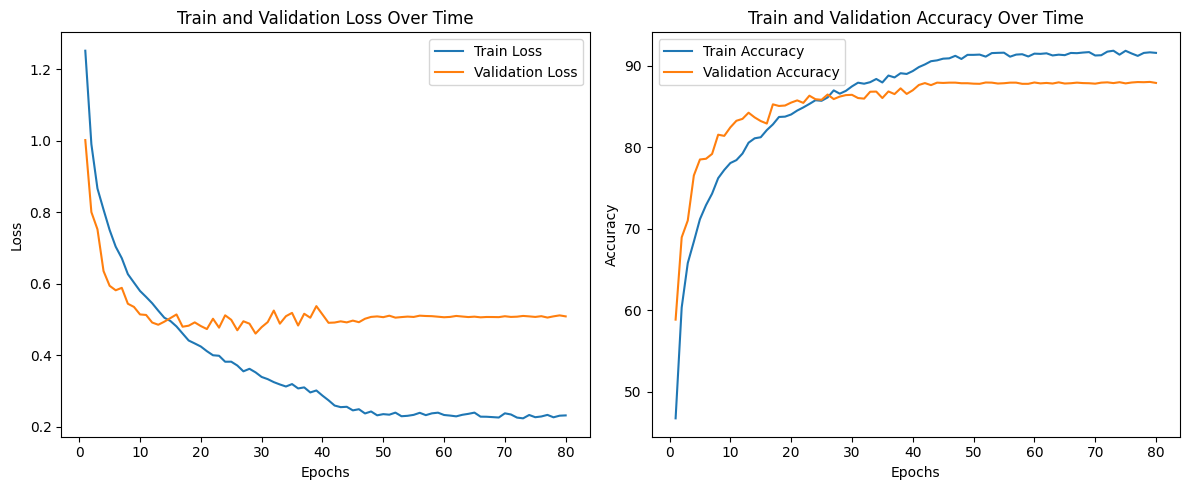

In [73]:
checkpoint_dir = 'mobilenet-split-1'
epochs, train_losses, val_losses, train_accs, val_accs = load_and_plot_metrics(checkpoint_dir)
# plot_metrics(epochs, train_losses, val_losses, train_accs, val_accs)

epoch_1.pth epoch_10.pth epoch_11.pth epoch_12.pth epoch_13.pth epoch_14.pth epoch_15.pth epoch_16.pth epoch_17.pth epoch_18.pth epoch_19.pth epoch_2.pth epoch_20.pth epoch_21.pth epoch_22.pth epoch_23.pth epoch_24.pth epoch_25.pth epoch_26.pth epoch_27.pth epoch_28.pth epoch_29.pth epoch_3.pth epoch_30.pth epoch_31.pth epoch_32.pth epoch_33.pth epoch_34.pth epoch_35.pth epoch_36.pth epoch_37.pth epoch_38.pth epoch_4.pth epoch_5.pth epoch_6.pth epoch_7.pth epoch_8.pth epoch_9.pth


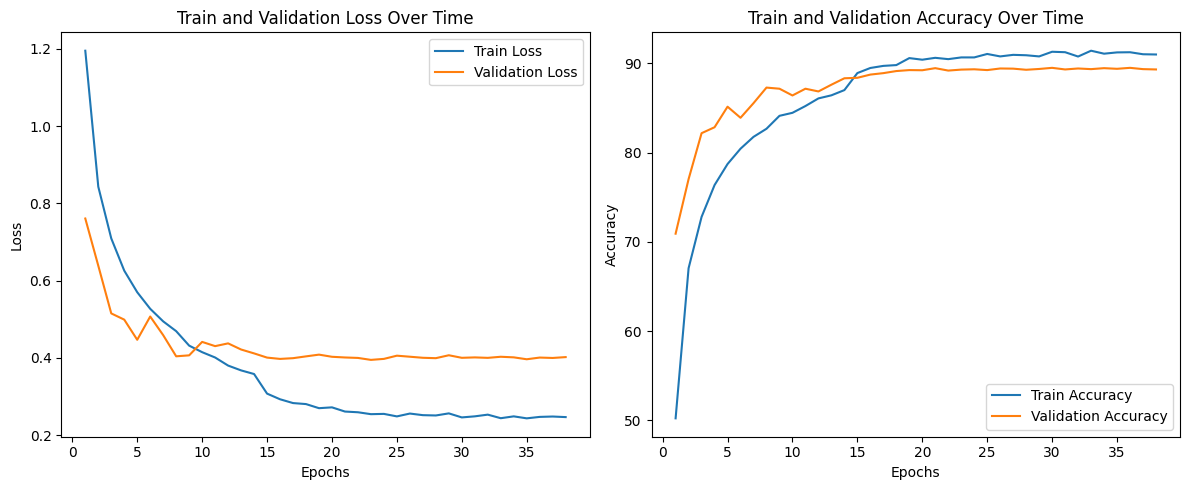

In [74]:
checkpoint_dir = 'models-resNet-split-2'
epochs, train_losses, val_losses, train_accs, val_accs = load_and_plot_metrics(checkpoint_dir)
# plot_metrics(epochs, train_losses, val_losses, train_accs, val_accs)

epoch_1.pth epoch_10.pth epoch_11.pth epoch_12.pth epoch_13.pth epoch_14.pth epoch_15.pth epoch_16.pth epoch_17.pth epoch_18.pth epoch_19.pth epoch_2.pth epoch_20.pth epoch_21.pth epoch_22.pth epoch_23.pth epoch_24.pth epoch_25.pth epoch_26.pth epoch_27.pth epoch_28.pth epoch_29.pth epoch_3.pth epoch_30.pth epoch_31.pth epoch_32.pth epoch_33.pth epoch_34.pth epoch_35.pth epoch_36.pth epoch_37.pth epoch_38.pth epoch_4.pth epoch_5.pth epoch_6.pth epoch_7.pth epoch_8.pth epoch_9.pth


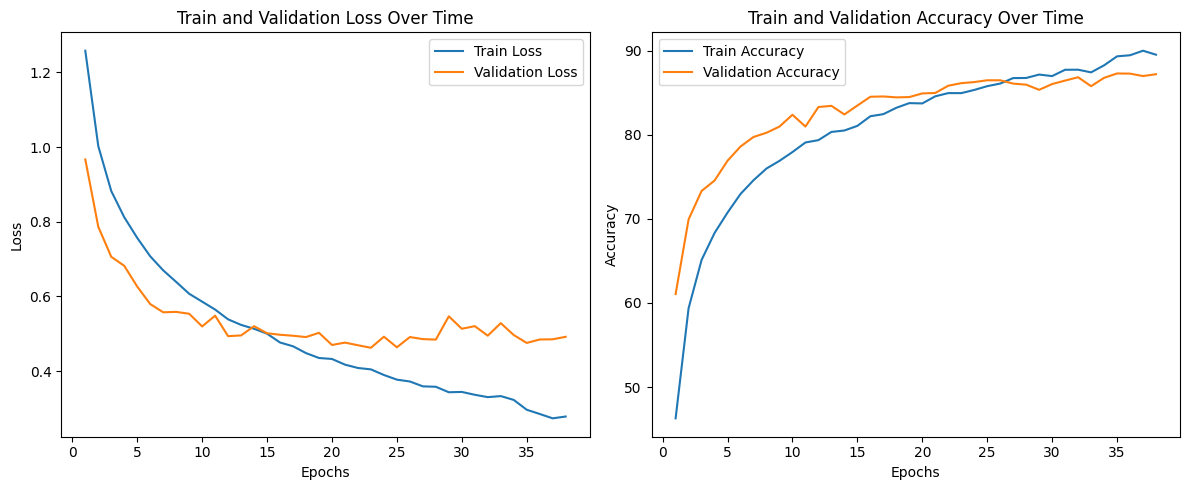

In [75]:
checkpoint_dir = 'models-mobile-net-split-3'
epochs, train_losses, val_losses, train_accs, val_accs = load_and_plot_metrics(checkpoint_dir)
# plot_metrics(epochs, train_losses, val_losses, train_accs, val_accs)

epoch_1.pth epoch_10.pth epoch_11.pth epoch_12.pth epoch_13.pth epoch_14.pth epoch_15.pth epoch_16.pth epoch_17.pth epoch_18.pth epoch_19.pth epoch_2.pth epoch_20.pth epoch_21.pth epoch_22.pth epoch_23.pth epoch_24.pth epoch_25.pth epoch_26.pth epoch_27.pth epoch_28.pth epoch_29.pth epoch_3.pth epoch_30.pth epoch_4.pth epoch_5.pth epoch_6.pth epoch_7.pth epoch_8.pth epoch_9.pth


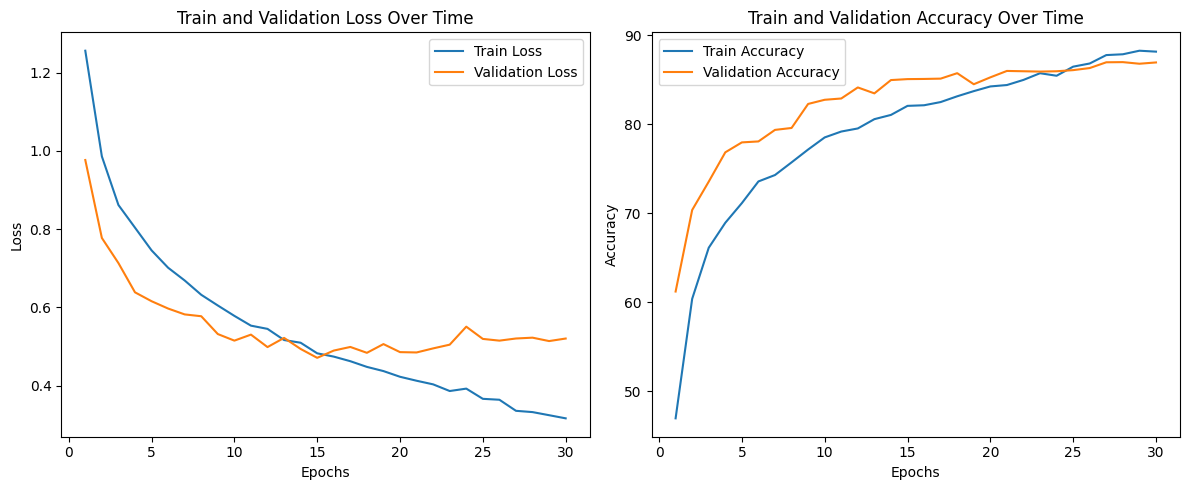

In [77]:
checkpoint_dir = 'models-mobile-net-split-4'
epochs, train_losses, val_losses, train_accs, val_accs = load_and_plot_metrics(checkpoint_dir)

epoch_1.pth epoch_10.pth epoch_11.pth epoch_12.pth epoch_13.pth epoch_14.pth epoch_15.pth epoch_16.pth epoch_17.pth epoch_18.pth epoch_19.pth epoch_2.pth epoch_20.pth epoch_21.pth epoch_22.pth epoch_23.pth epoch_24.pth epoch_25.pth epoch_26.pth epoch_27.pth epoch_28.pth epoch_29.pth epoch_3.pth epoch_30.pth epoch_4.pth epoch_5.pth epoch_6.pth epoch_7.pth epoch_8.pth epoch_9.pth


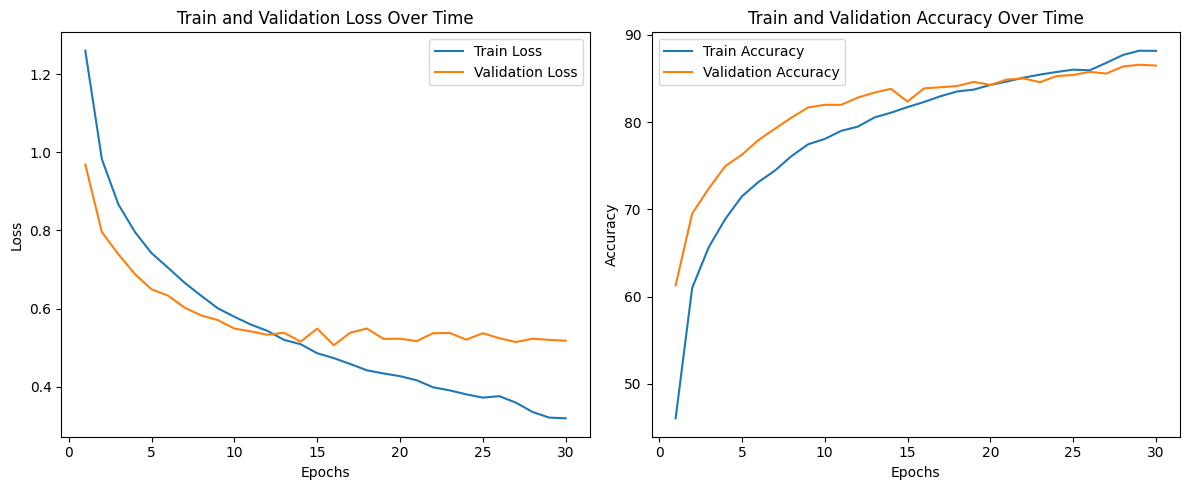

In [78]:
checkpoint_dir = 'models-mobilenet-split-5'
epochs, train_losses, val_losses, train_accs, val_accs = load_and_plot_metrics(checkpoint_dir)

In [133]:
def plot_metrics_and_confusion_matrix(csv_file, reverse_label_mapping):
    # Read the CSV file
    data = pd.read_csv(csv_file)

    # Ensure the relevant columns are present
    if 'label_idx' not in data.columns or 'predictions' not in data.columns:
        raise ValueError("CSV must contain 'label_idx' and 'predictions' columns.")

    # Get the true labels and predictions
    y_true = data['label_idx']
    y_pred = data['predictions']

    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Get the labels for plotting
    labels = [reverse_label_mapping[i] for i in range(len(reverse_label_mapping))]

    # Calculate precision, recall, f1 score, and accuracy
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None, labels=list(reverse_label_mapping.keys()))
    accuracy = accuracy_score(y_true, y_pred)

    # Create a DataFrame for the metrics
    metrics_df = pd.DataFrame({
        'Label': labels,
        'Precision': [prec.round(4) for prec in precision],
        'Recall': [rec.round(4) for rec in recall],
        'F1 Score': [f1_score.round(4) for f1_score in f1],
    })

    # Plot the confusion matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    print("Metrics by Class over Loadable Images:")
    print(metrics_df)
    print(f"\nOverall Accuracy: {(accuracy*100):.4f}")


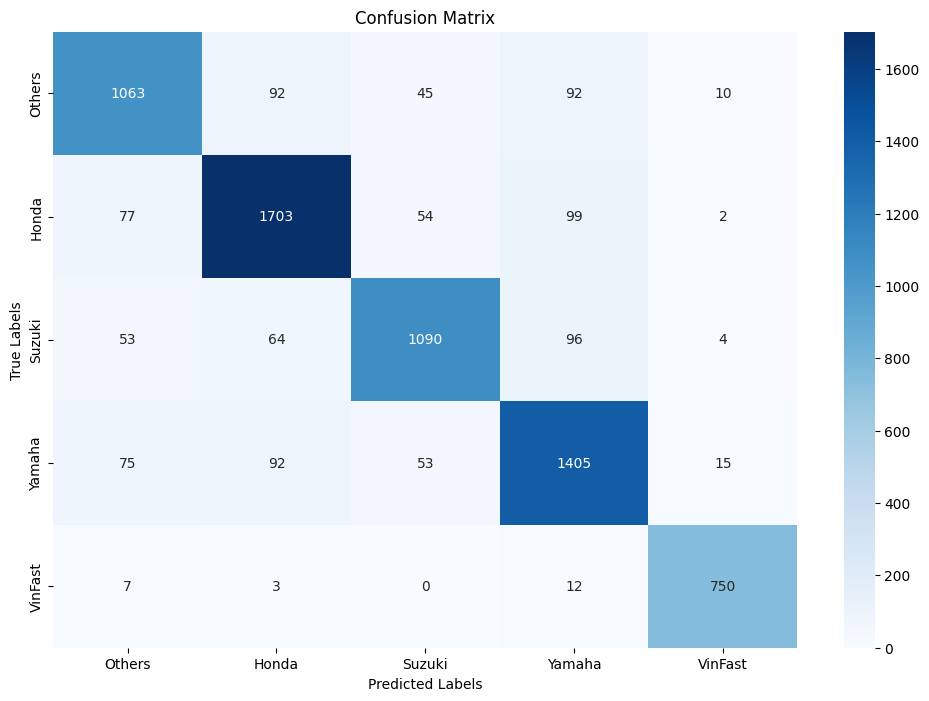

Metrics by Class over Loadable Images:
     Label  Precision  Recall  F1 Score
0   Others     0.8337  0.8164    0.8250
1    Honda     0.8715  0.8801    0.8758
2   Suzuki     0.8776  0.8340    0.8552
3   Yamaha     0.8245  0.8567    0.8403
4  VinFast     0.9603  0.9715    0.9659

Overall Accuracy: 86.4146


In [134]:
csv_file = 'predictions-split-1.csv'
plot_metrics_and_confusion_matrix(csv_file, reverse_label_mapping)

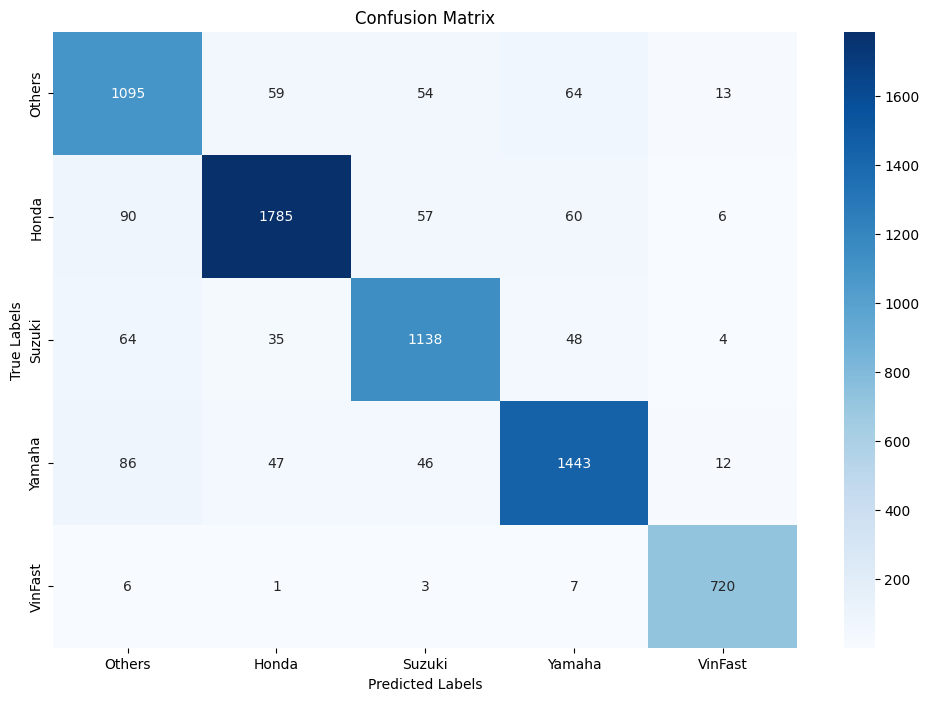

Metrics by Class over Loadable Images:
     Label  Precision  Recall  F1 Score
0   Others     0.8166  0.8521    0.8340
1    Honda     0.9263  0.8934    0.9096
2   Suzuki     0.8767  0.8829    0.8798
3   Yamaha     0.8896  0.8831    0.8864
4  VinFast     0.9536  0.9769    0.9651

Overall Accuracy: 89.0249


In [135]:
csv_file = 'predictions-split-2.csv'
plot_metrics_and_confusion_matrix(csv_file, reverse_label_mapping)

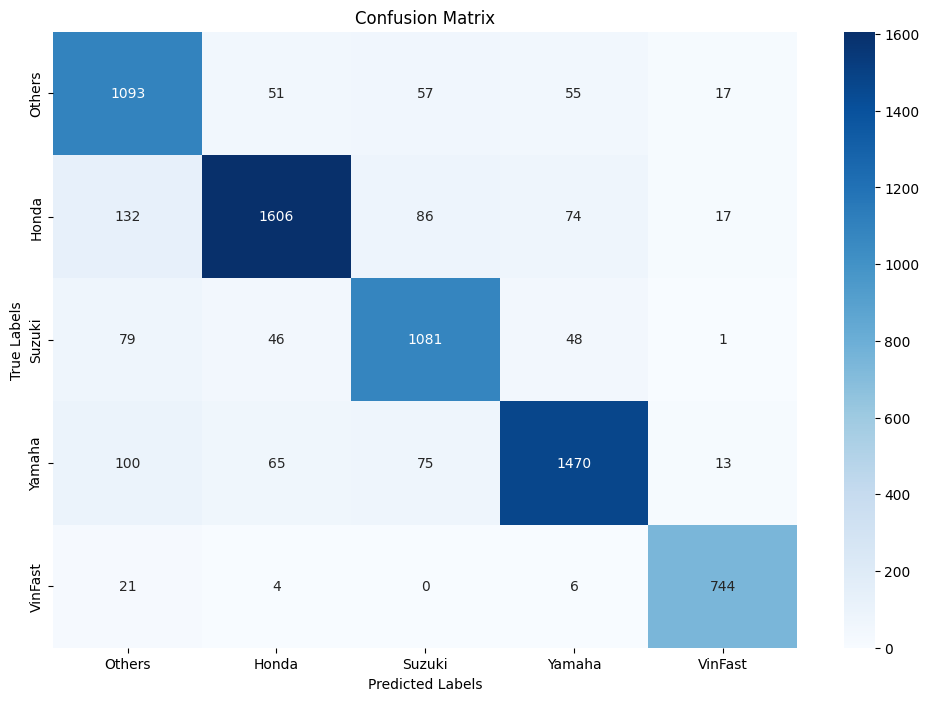

Metrics by Class over Loadable Images:
     Label  Precision  Recall  F1 Score
0   Others     0.7670  0.8586    0.8102
1    Honda     0.9063  0.8386    0.8712
2   Suzuki     0.8322  0.8614    0.8465
3   Yamaha     0.8893  0.8532    0.8709
4  VinFast     0.9394  0.9600    0.9496

Overall Accuracy: 86.3564


In [136]:
csv_file = 'predictions-split-3.csv'
plot_metrics_and_confusion_matrix(csv_file, reverse_label_mapping)

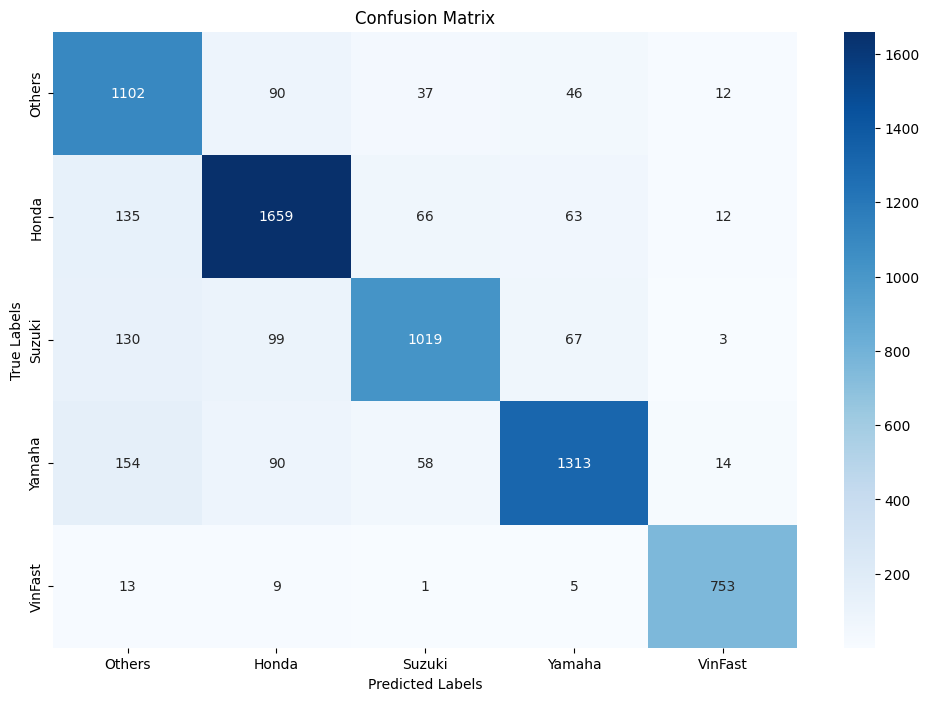

Metrics by Class over Loadable Images:
     Label  Precision  Recall  F1 Score
0   Others     0.7184  0.8563    0.7813
1    Honda     0.8521  0.8574    0.8547
2   Suzuki     0.8628  0.7731    0.8155
3   Yamaha     0.8788  0.8060    0.8409
4  VinFast     0.9484  0.9641    0.9562

Overall Accuracy: 84.1151


In [137]:
csv_file = 'predictions-split-4.csv'
plot_metrics_and_confusion_matrix(csv_file, reverse_label_mapping)

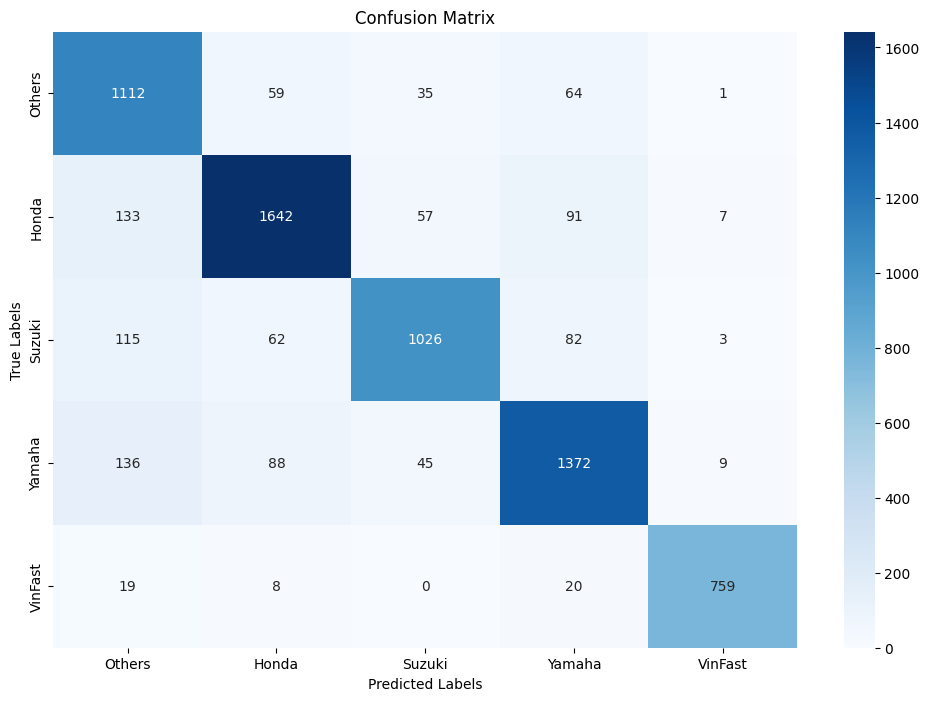

Metrics by Class over Loadable Images:
     Label  Precision  Recall  F1 Score
0   Others     0.7340  0.8749    0.7983
1    Honda     0.8833  0.8508    0.8667
2   Suzuki     0.8822  0.7966    0.8372
3   Yamaha     0.8422  0.8315    0.8368
4  VinFast     0.9743  0.9417    0.9577

Overall Accuracy: 85.1116


In [138]:
csv_file = 'predictions-split-5.csv'
plot_metrics_and_confusion_matrix(csv_file, reverse_label_mapping)